# Preliminery Analysis

In [43]:
## Import Libraries

import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point

In [44]:
## Read Data

msoa = gpd.read_file("Data/manchester_msoa/manchester_msoa.shp")

lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa_updated.shp")

df_bus = pd.read_csv("Data/TfGMStoppingPoints.csv")

df_stations = pd.read_csv("Data/TfGMMetroRailStops.csv")

df_pop = pd.read_csv("Data/population_msoa.csv", skiprows=3)

df_pop_2 = pd.read_csv("Data/population_lsoa.csv", skiprows=3, low_memory=False)

drt_zones = gpd.read_file("Data/LocalLink_MapData/SHP-format/Locallink_Areas.shp")

lsoa_centroid = gpd.read_file("Data/lsoa_centroids/lsoa_centroid.shp")

msoa_centroid = gpd.read_file("Data/msoa_centroids/msoa_centroids.shp")

df_avg_income = pd.read_csv("Data/average_income_msoa.csv", skiprows=4)

car_disabled = pd.read_csv("Data/car_disabled_lsoa.csv")

<Axes: >

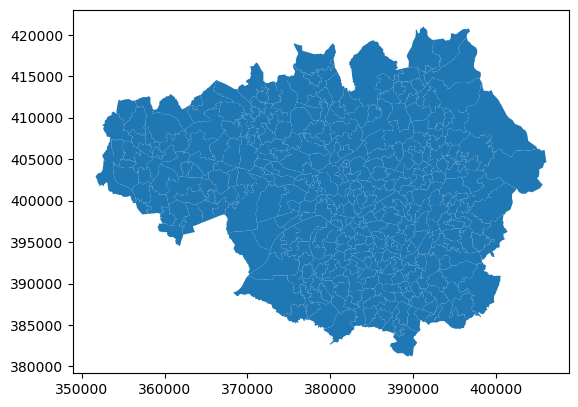

In [45]:
msoa.plot()

In [46]:
msoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hclnm     384 non-null    object  
 1   hclnmw    0 non-null      float64 
 2   label     384 non-null    object  
 3   msoa21cd  384 non-null    object  
 4   msoa21nm  384 non-null    object  
 5   name      384 non-null    object  
 6   geometry  384 non-null    geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 21.1+ KB


## Population - Transport Infrastructure Ratio

### Creating Bus Stop Points

In [47]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21106 entries, 0 to 21105
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AtcoCode                 21106 non-null  object 
 1   NaptanCode               13667 non-null  object 
 2   PlateCode                3 non-null      object 
 3   CleardownCode            0 non-null      float64
 4   CommonName               21106 non-null  object 
 5   CommonNameLang           0 non-null      float64
 6   ShortCommonName          13060 non-null  object 
 7   ShortCommonNameLang      0 non-null      float64
 8   Landmark                 17765 non-null  object 
 9   LandmarkLang             0 non-null      float64
 10  Street                   20837 non-null  object 
 11  StreetLang               0 non-null      float64
 12  Crossing                 47 non-null     object 
 13  CrossingLang             0 non-null      float64
 14  Indicator             

In [48]:
## Create gdf of bus stop points from df based on easting and northing

bus_points = gpd.GeoDataFrame(df_bus, geometry=gpd.points_from_xy(df_bus.Easting, df_bus.Northing))
bus_points.set_crs(epsg=27700, inplace=True)

AtcoCode NaptanCode PlateCode  CleardownCode  \
0      1800WKH4032        NaN       NaN            NaN   
1      1800SBT0641        NaN       NaN            NaN   
2      1800SBT0351        NaN       NaN            NaN   
3      1800SG44991   MANJMGMW       NaN            NaN   
4      1800SGH2781        NaN       NaN            NaN   
...            ...        ...       ...            ...   
21101  1800SBH1601        NaN       NaN            NaN   
21102  1800NE16201   MANDWTDG       NaN            NaN   
21103  1800NB40971   MANDJWGM       NaN            NaN   
21104  1800NB40961   MANDJWGJ       NaN            NaN   
21105  1800SG06671   MANJAMWM       NaN            NaN   

                          CommonName  CommonNameLang ShortCommonName  \
0                   Churchlands Lane             NaN             NaN   
1                        High Street             NaN             NaN   
2                       Peter Street             NaN             NaN   
3                         A34 Bridge             NaN      A34 Bridge   
4        A34 Roundabout (to def rte)             NaN             NaN   
...                              ...             ...             ...   
21101  York Street (to define route)             NaN             NaN   
21102                   Yorkshire St             NaN    Yorkshire St   
21103                     Youth Club             NaN      Youth Club   
21104                     Youth Club             NaN      Youth Club   
21105                 Zurich Gardens             NaN  Zurich Gardens   

       ShortCommonNameLang                       Landmark  LandmarkLang  ...  \
0                      NaN                 CHURCHLANDS LA           NaN  ...   
1                      NaN                            NaN           NaN  ...   
2                      NaN                            NaN           NaN  ...   
3                      NaN                       HOUSE 61           NaN  ...   
4                      NaN                HANDFORTH BYPAS           NaN  ...   
...                    ...                            ...           ...  ...   
21101                  NaN  York Street (to define route)           NaN  ...   
21102                  NaN                           BANK           NaN  ...   
21103                  NaN                        GARAGES           NaN  ...   
21104                  NaN                      HOUSE 208           NaN  ...   
21105                  NaN                            NaN           NaN  ...   

      DefaultWaitTime                  Notes NotesLang  \
0                 NaN                    NaN       NaN   
1                 NaN                    NaN       NaN   
2                 NaN                    NaN       NaN   
3                 NaN      INDICATOR AMENDED       NaN   
4                 NaN                    NaN       NaN   
...               ...                    ...       ...   
21101             NaN                    NaN       NaN   
21102             NaN  STOP LOCATION AMENDED       NaN   
21103             NaN      INDICATOR AMENDED       NaN   
21104             NaN                    NaN       NaN   
21105             NaN      INDICATOR AMENDED       NaN   

       AdministrativeAreaCode     CreationDateTime  ModificationDateTime  \
0                          83  2007-11-01T00:00:00   2007-11-01T00:00:00   
1                          83  2004-09-14T00:00:00   2019-07-31T14:34:30   
2                          83  2004-09-14T00:00:00   2019-07-31T14:47:41   
3                          83  2014-02-17T00:00:00   2014-02-17T00:00:00   
4                          83  2007-11-01T00:00:00   2007-11-01T00:00:00   
...                       ...                  ...                   ...   
21101                      83  2007-11-01T00:00:00   2007-11-01T00:00:00   
21102                      83  2015-04-28T00:00:00   2015-04-28T00:00:00   
21103                      83  2010-04-20T00:00:00   2010-04-20T00:00:00   
21104                      83 

In [49]:
## Export gdf of bus stop points to shapefile

bus_points.to_file("Data/Bus_stop/bus_points.shp")

/tmp/ipykernel_7007/1946094070.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bus_points.to_file("Data/Bus_stop/bus_points.shp")


<Axes: >

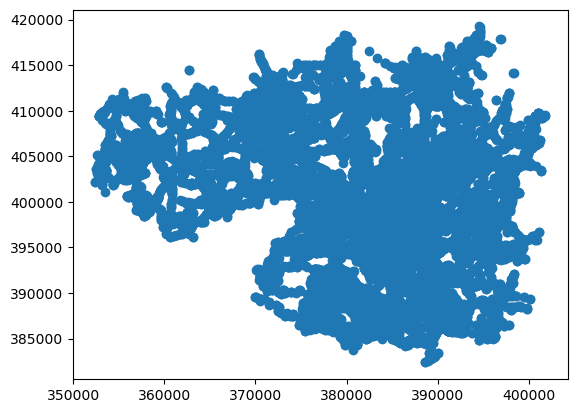

In [50]:
bus_points.plot()

### Creating Station Points

In [51]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NPTREF  190 non-null    object 
 1   SMSREF  99 non-null     object 
 2   GPSLAT  190 non-null    float64
 3   GPSLON  190 non-null    float64
 4   GMGRFE  190 non-null    int64  
 5   GMGRFN  190 non-null    int64  
 6   RSTNAM  190 non-null    object 
 7   MAINRD  190 non-null    object 
 8   SIDEST  134 non-null    object 
 9   NETTYP  190 non-null    object 
 10  GAZREF  190 non-null    object 
 11  NETWRF  190 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 17.9+ KB


In [52]:
## Create gdf of station points from df based on easting and northing

station_points = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.GMGRFE, df_stations.GMGRFN))
station_points.set_crs(epsg=27700, inplace=True)

NPTREF    SMSREF     GPSLAT    GPSLON  GMGRFE  GMGRFN  \
0    9100ALTRNHM       NaN  53.387668 -2.347158  377008  387924   
1    9100ARDWICK       NaN  53.471206 -2.213369  385934  397183   
2    9100ASHBRYS       NaN  53.471867 -2.194752  387150  397253   
3    9100ASHONUL       NaN  53.491279 -2.094327  393839  399399   
4    9100ATHERTN       NaN  53.529109 -2.477990  368412  403710   
..           ...       ...        ...       ...     ...     ...   
185  9400ZZMAWPK  MANTWGTM  53.407671 -2.295666  380442  390134   
186  9400ZZMAWST  MANTMWGP  53.482488 -2.308000  379658  398461   
187  9400ZZMAWTD  MANTWDGA  53.424477 -2.236039  384412  391989   
188  9400ZZMAWWD  MANTWGDJ  53.542321 -2.125871  391756  405081   
189  9400ZZMAWYT  MANTWJDP  53.380025 -2.263755  382552  387050   

                      RSTNAM           MAINRD          SIDEST NETTYP  \
0     ALTRINCHAM INTERCHANGE  STAMFORD NEW RD       MOSS LANE      R   
1                    ARDWICK  DEVONSHIRE ST N      BLIND LANE      R   
2                   ASHBURYS     POTTERY LANE  JARMAIN STREET      R   
3          ASHTON UNDER LYNE     SACKVILLE ST     TURNER LANE      R   
4                   ATHERTON       UPTON ROAD     BOLTON ROAD      R   
..                       ...              ...             ...    ...   
185         Wythenshawe Park   WYTHENSHAWE RD             NaN      M   
186                   Weaste    ECCLES NEW RD    KNOTT STREET      M   
187            West Didsbury     LAPWING LANE             NaN      M   
188                 Westwood     MIDDLETON RD             NaN      M   
189  Wythenshawe Town Centre      AINLEY ROAD             NaN      M   

       GAZREF  NETWRF                       geometry  
0    E0028261  SJR032  POINT (377008.000 387924.000)  
1    E0028484  EBR116  POINT (385934.000 397183.000)  
2    N0074883  EBR115  POINT (387150.000 397253.000)  
3    E0028492  EHR101  POINT (393839.000 399399.000)  
4    E0028727  WKR069  POINT (368412.000 403710.000)  
..        ...     ...                            ...  
185  N0075104  SBR694  POINT (380442.000 390134.000)  
186  E0029513  NFR486  POINT (379658.000 398461.000)  
187  E0029519  SBR648  POINT (384412.000 391989.000)  
188  E0029527  EDR676  POINT (391756.000 405081.000)  
189  E0029594  SBR715  POINT (382552.000 387050.000)  

[190 rows x 13 columns]

In [53]:
## Export gdf of station points to shapefile

station_points.to_file("Data/Stations/station_points.shp")

<Axes: >

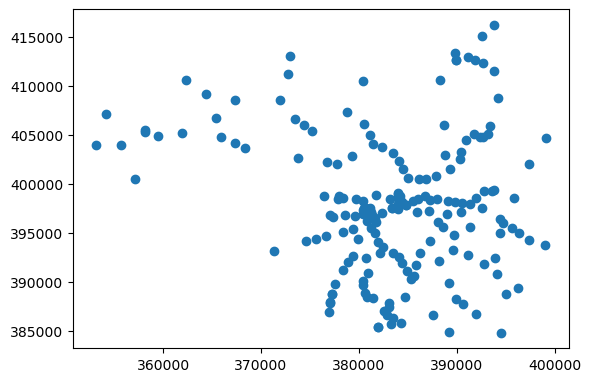

In [54]:
station_points.plot()

### Plot Transport Infrastructure

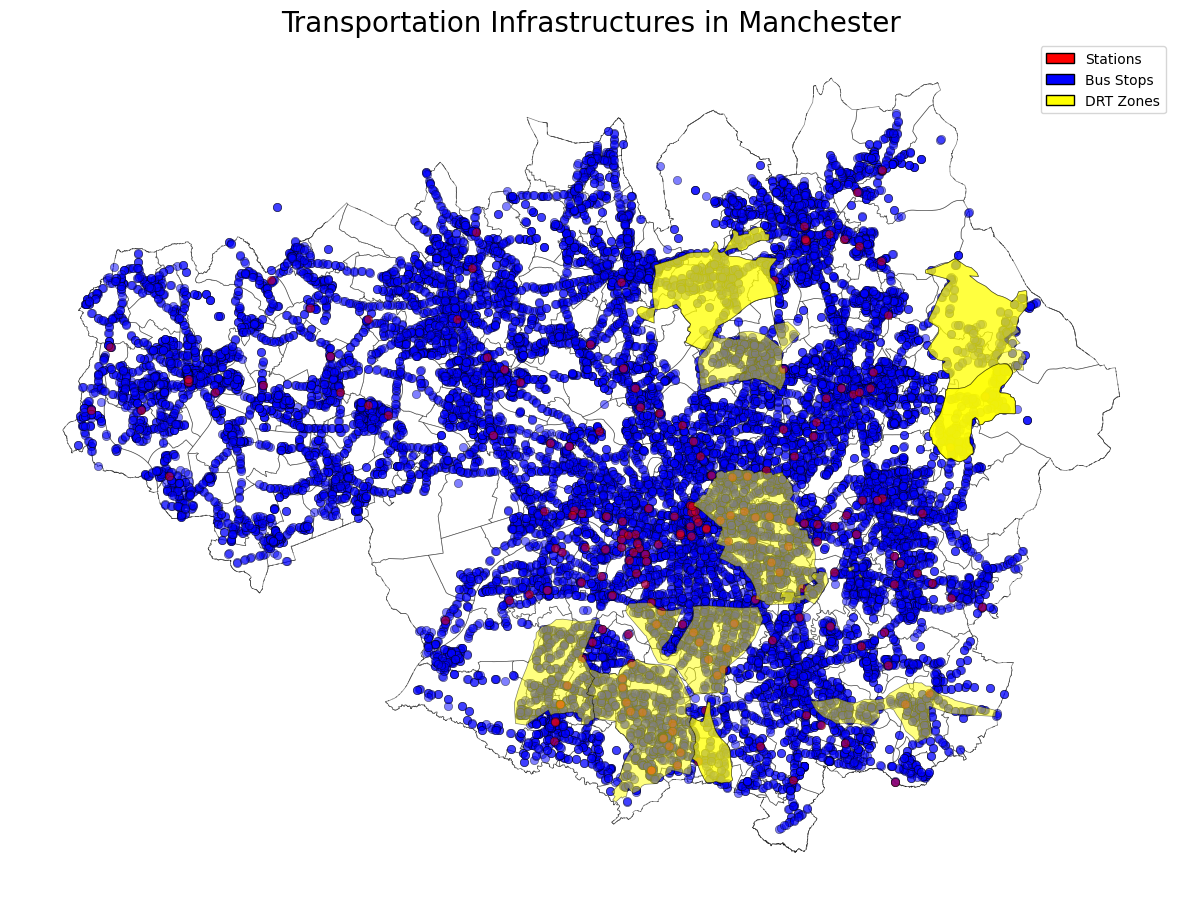

In [55]:
## Plot bus stops, stations, and Local Link zones
## To add: Label of each zone

fig, ax = plt.subplots(figsize=(15, 15))

msoa.plot(ax=ax, facecolor="white", alpha=0.5, edgecolor="black", linewidth=0.5)
bus_points.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", linewidth=0.5)
station_points.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", linewidth=0.5)
drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Transportation Infrastructures in Manchester", fontsize=20)
ax.set_axis_off()

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Stations'),
    Patch(facecolor='blue', edgecolor='black', label='Bus Stops'),
    Patch(facecolor='yellow', edgecolor='black', label='DRT Zones'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

### Calculating Population-Bus Stop Ratio

In [56]:
## Keep population data only within Greater Manchester MSOA
## Erase comma in the population data

pop_msoa = df_pop[df_pop["MSOA 2021 Code"].isin(msoa["msoa21cd"].unique())]
pop_msoa["Total"] = pop_msoa["Total"].str.replace(",", "").astype(int)

/tmp/ipykernel_7007/523150583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_msoa["Total"] = pop_msoa["Total"].str.replace(",", "").astype(int)


In [57]:
## Spatial join bus stops to msoa to count the total number of bus stops per msoa

msoa_bus = gpd.sjoin(msoa, bus_points, how="left", predicate="contains")
bus_counts = msoa_bus.groupby("msoa21cd").size().reset_index(name="count")

## Merge the total number of bus stops in each msoa with population
## Calculate population - bus stops ratio
merge_bus_msoa = pd.merge(bus_counts, pop_msoa, left_on="msoa21cd", right_on="MSOA 2021 Code")
merge_bus_msoa["bus_pop_ratio"] = merge_bus_msoa["Total"] / merge_bus_msoa["count"]

## Drop redundant column
merge_bus_msoa.drop("MSOA 2021 Code", axis=1)

msoa21cd  count LAD 2021 Code LAD 2021 Name  MSOA 2021 Name  Total  \
0    E02000984     58     E08000001        Bolton      Bolton 001   7748   
1    E02000985     58     E08000001        Bolton      Bolton 002   7349   
2    E02000986     69     E08000001        Bolton      Bolton 003   8484   
3    E02000987     56     E08000001        Bolton      Bolton 004   7377   
4    E02000988     61     E08000001        Bolton      Bolton 005   9049   
..         ...    ...           ...           ...             ...    ...   
379  E02006984     55     E08000003    Manchester  Manchester 062   5554   
380  E02006985     23     E08000003    Manchester  Manchester 063   9302   
381  E02006986     20     E08000003    Manchester  Manchester 064   6300   
382  E02007000     33     E08000004        Oldham      Oldham 036   7655   
383  E02007001     24     E08000004        Oldham      Oldham 037   8556   

     F0 to 4  F5 to 9  F10 to 14 F15 to 19  ... M50 to 54 M55 to 59 M60 to 64  \
0        181      222        221       205  ...       323       309       238   
1        147      175        230       218  ...       323       265       233   
2        216      230        270       240  ...       347       327       245   
3        148      181        205       151  ...       281       300       237   
4        268      316        292       312  ...       313       264       237   
..       ...      ...        ...       ...  ...       ...       ...       ...   
379      100       75         65        55  ...       140        55        70   
380      397      431        479       413  ...       316       215       140   
381      279      303        272       229  ...       216       164        84   
382      344      354        386       312  ...       210       160       110   
383      352      330        389       395  ...       252       165       160   

     M65 to 69  M70 to 74  M75 to 79  M80 to 84  M85 to 89  M90 and over  \
0          232        261        204         99         41            26   
1          211        232        196        168        101            25   
2          192        207        151        152         60            45   
3          188        199        154         61         53            18   
4          186        178        108         93         35            62   
..         ...        ...        ...        ...        ...           ...   
379         40         38         21         25          0             0   
380         86         75         32         28          6            12   
381         65         65          9         25          0             0   
382        135         60         25         25          0             8   
383        135         78         40         50         20            10   

     bus_pop_ratio  
0       133.586207  
1       126.706897  
2       122.956522  
3       131.732143  
4       148.344262  
..             ...  
379     100.981818  
380     404.434783  
381     315.000000  
382     231.969697  
383     356.500000  

[384 rows x 45 columns]

### Calculating Stations - Population Ratio

In [58]:
## Spatial join stations to msoa to count the total number of stations per msoa
msoa_stations = gpd.sjoin(msoa, station_points, how="left", predicate="contains")
station_counts = msoa_stations.groupby("msoa21cd").size().reset_index(name="count")

## Merge the total number of stations in each msoa with population
## Calculate population - stations ratio
merge_station_msoa = pd.merge(station_counts, pop_msoa, left_on="msoa21cd", right_on="MSOA 2021 Code")
merge_station_msoa["station_pop_ratio"] = merge_station_msoa["Total"] / merge_station_msoa["count"]

## Drop redundant column
merge_station_msoa.drop("MSOA 2021 Code", axis=1)

msoa21cd  count LAD 2021 Code LAD 2021 Name  MSOA 2021 Name  Total  \
0    E02000984      1     E08000001        Bolton      Bolton 001   7748   
1    E02000985      1     E08000001        Bolton      Bolton 002   7349   
2    E02000986      1     E08000001        Bolton      Bolton 003   8484   
3    E02000987      1     E08000001        Bolton      Bolton 004   7377   
4    E02000988      1     E08000001        Bolton      Bolton 005   9049   
..         ...    ...           ...           ...             ...    ...   
379  E02006984      2     E08000003    Manchester  Manchester 062   5554   
380  E02006985      1     E08000003    Manchester  Manchester 063   9302   
381  E02006986      1     E08000003    Manchester  Manchester 064   6300   
382  E02007000      1     E08000004        Oldham      Oldham 036   7655   
383  E02007001      1     E08000004        Oldham      Oldham 037   8556   

     F0 to 4  F5 to 9  F10 to 14 F15 to 19  ... M50 to 54 M55 to 59 M60 to 64  \
0        181      222        221       205  ...       323       309       238   
1        147      175        230       218  ...       323       265       233   
2        216      230        270       240  ...       347       327       245   
3        148      181        205       151  ...       281       300       237   
4        268      316        292       312  ...       313       264       237   
..       ...      ...        ...       ...  ...       ...       ...       ...   
379      100       75         65        55  ...       140        55        70   
380      397      431        479       413  ...       316       215       140   
381      279      303        272       229  ...       216       164        84   
382      344      354        386       312  ...       210       160       110   
383      352      330        389       395  ...       252       165       160   

     M65 to 69  M70 to 74  M75 to 79  M80 to 84  M85 to 89  M90 and over  \
0          232        261        204         99         41            26   
1          211        232        196        168        101            25   
2          192        207        151        152         60            45   
3          188        199        154         61         53            18   
4          186        178        108         93         35            62   
..         ...        ...        ...        ...        ...           ...   
379         40         38         21         25          0             0   
380         86         75         32         28          6            12   
381         65         65          9         25          0             0   
382        135         60         25         25          0             8   
383        135         78         40         50         20            10   

     station_pop_ratio  
0               7748.0  
1               7349.0  
2               8484.0  
3               7377.0  
4               9049.0  
..                 ...  
379             2777.0  
380             9302.0  
381             6300.0  
382             7655.0  
383             8556.0  

[384 rows x 45 columns]

### Merge to Shapefile and Plot

In [59]:
## merge population - bus stops ratio and population - stations ratio to msoa shapefile
merge_msoa = msoa.merge(merge_bus_msoa[["msoa21cd", "bus_pop_ratio"]], on="msoa21cd")
merge_msoa = merge_msoa.merge(merge_station_msoa[["msoa21cd", "station_pop_ratio"]], on="msoa21cd")

In [60]:
merge_msoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   hclnm              384 non-null    object  
 1   hclnmw             0 non-null      float64 
 2   label              384 non-null    object  
 3   msoa21cd           384 non-null    object  
 4   msoa21nm           384 non-null    object  
 5   name               384 non-null    object  
 6   geometry           384 non-null    geometry
 7   bus_pop_ratio      384 non-null    float64 
 8   station_pop_ratio  384 non-null    float64 
dtypes: float64(3), geometry(1), object(5)
memory usage: 27.1+ KB


<Axes: >

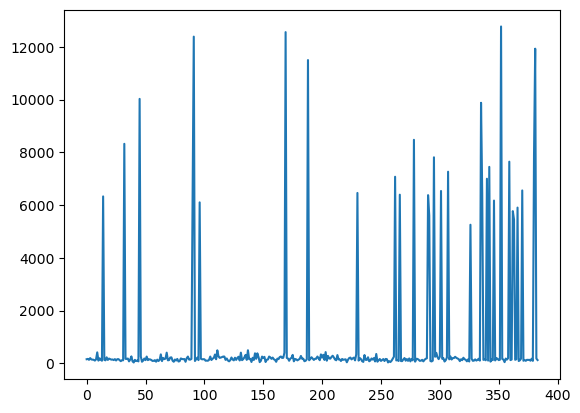

In [61]:
## Histogram to see the distribution
merge_msoa.bus_pop_ratio.plot()

(348941.3699999996, 408808.4300000002, 379171.78500000044, 423031.3149999992)

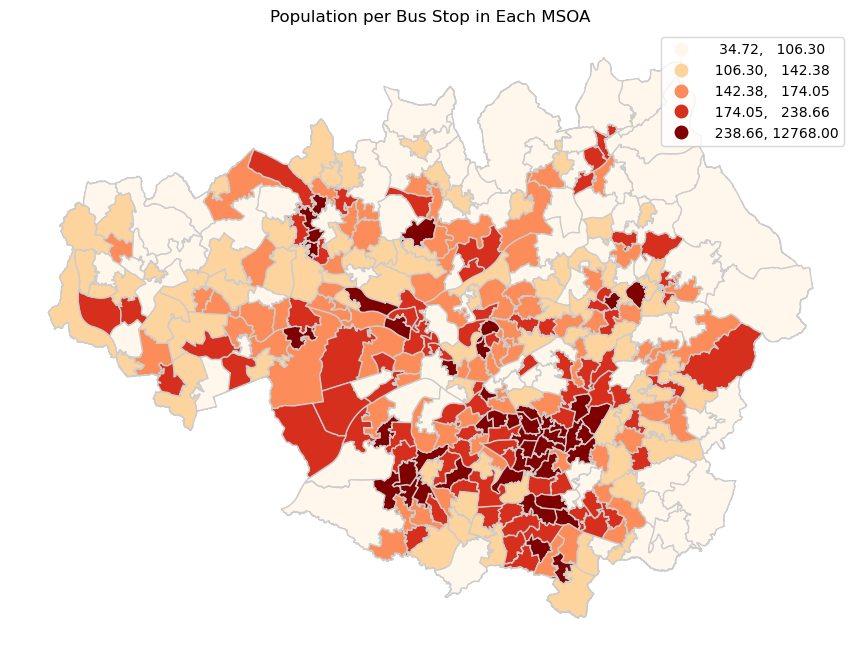

In [62]:
## Plot population - bus stops ratio
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa.plot(column="bus_pop_ratio",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="quantiles")

#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population per Bus Stop in Each MSOA")
ax.axis("off")

(348941.3699999996, 408808.4300000002, 379171.78500000044, 423031.3149999992)

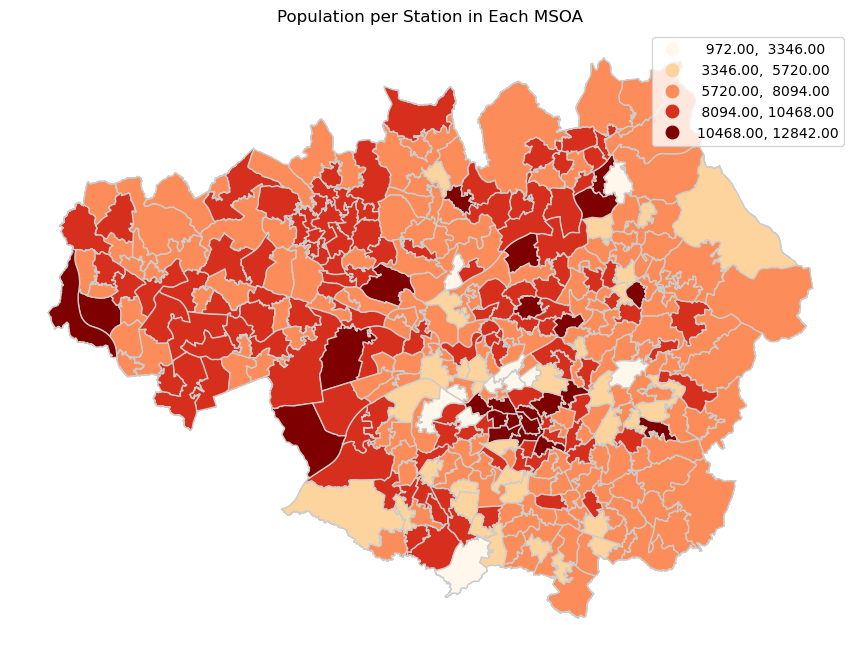

In [63]:
## Plot population - stations ratio
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa.plot(column="station_pop_ratio",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="equalinterval")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population per Station in Each MSOA")
ax.axis("off")

## Population Density

In [64]:
## Calculate area of each msoa
merge_msoa["area_sqkm"] = merge_msoa["geometry"].area / 10**6

## Calculate population density in each msoa
merge_pop_msoa = pd.merge(merge_msoa, pop_msoa, left_on = "msoa21cd", right_on = "MSOA 2021 Code")
merge_pop_msoa["pop_density"] = merge_pop_msoa["Total"] / merge_pop_msoa["area_sqkm"]

## Merge the population density value to gdf
merge_msoa = merge_msoa.merge(merge_pop_msoa[["msoa21cd","pop_density"]], on="msoa21cd")

In [65]:
merge_msoa

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
379                   Leigh Central     NaN   
380                        Rainford     NaN   
381               Newton-le-Willows     NaN   
382                        Golborne     NaN   
383               Orrell & Longshaw     NaN   

                                    label   msoa21cd        msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012      Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160     Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158     Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161     Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988      Bolton 005   
..                                    ...        ...             ...   
379  E92000001E12000002E08000010E02001316  E02001316       Wigan 030   
380  E92000001E12000002E08000013E02001406  E02001406  St. Helens 001   
381  E92000001E12000002E08000013E02001420  E02001420  St. Helens 015   
382  E92000001E12000002E08000010E02001324  E02001324       Wigan 038   
383  E92000001E12000002E08000010E02001304  E02001304       Wigan 018   

               name                                           geometry  \
0        Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1       Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2       Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3       Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4        Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..              ...                                                ...   
379       Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
380  St. Helens 001  MULTIPOLYGON (((351865.000 402550.000, 351865....   
381  St. Helens 015  MULTIPOLYGON (((359881.005 396232.812, 359878....   
382       Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
383       Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm   pop_density  
0       157.983871             9795.0   1.729171  5.664563e+03  
1       170.162791             7317.0   2.578266  2.837954e+03  
2       134.600000             6057.0   1.206811  5.019012e+03  
3       201.172414             5834.0   2.546342  2.291129e+03  
4       148.344262             9049.0   1.951423  4.637129e+03  
..             ...                ...        ...           ...  
379      95.012821             7411.0   1.188032  6.238047e+03  
380    7887.000000             7887.0   0.000006  1.328906e+09  
381   11926.000000            11926.0   0.000025  4.718581e+08  
382     185.222222             8335.0   2.817467  2.958331e+03  
383     127.148515            12842.0  10.733309  1.196462e+03  

[384 rows x 11 columns]

(348941.3699999996, 408808.4300000002, 379171.78500000044, 423031.3149999992)

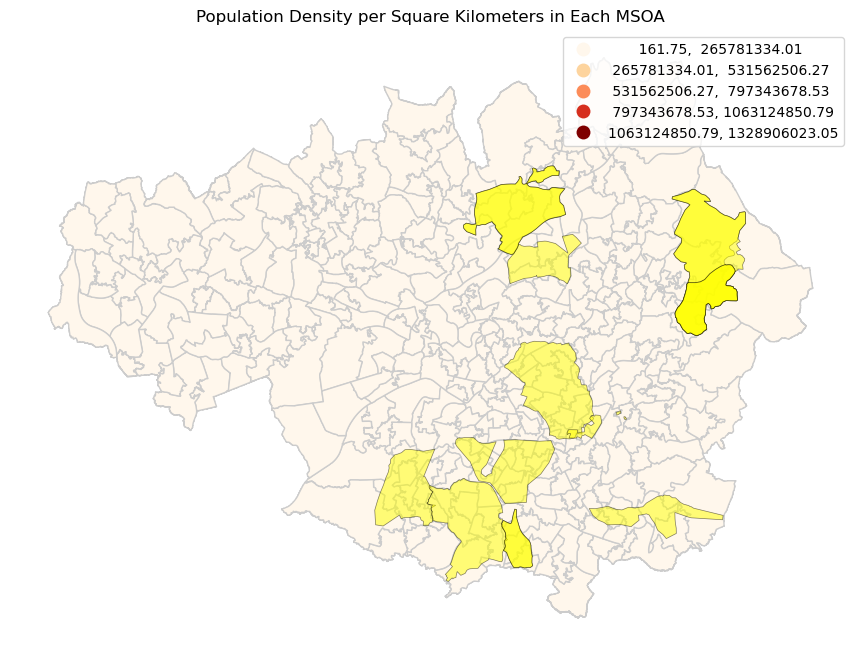

In [66]:
## Plot population density
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa.plot(column="pop_density",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="equalinterval")
drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population Density per Square Kilometers in Each MSOA")
ax.axis("off")

In [67]:
## Finding 7 msoas with the highest density
merge_msoa.nlargest(7, "pop_density")

hclnm  hclnmw  \
380                           Rainford     NaN   
262            Upperthong & Holmbridge     NaN   
91             Waterfoot & Stacksteads     NaN   
336                       Poynton East     NaN   
381                  Newton-le-Willows     NaN   
278  Ripponden, Rishworth & Barkisland     NaN   
230                       Poynton West     NaN   

                                    label   msoa21cd           msoa21nm  \
380  E92000001E12000002E08000013E02001406  E02001406     St. Helens 001   
262  E92000001E12000003E08000034E02002328  E02002328       Kirklees 058   
91   E92000001E12000002E07000125E02006884  E02006884     Rossendale 010   
336  E92000001E12000002E06000049E02003855  E02003855  Cheshire East 003   
381  E92000001E12000002E08000013E02001420  E02001420     St. Helens 015   
278  E92000001E12000003E08000033E02002270  E02002270     Calderdale 027   
230  E92000001E12000002E06000049E02003854  E02003854  Cheshire East 002   

                  name                                           geometry  \
380     St. Helens 001  MULTIPOLYGON (((351865.000 402550.000, 351865....   
262       Kirklees 058  MULTIPOLYGON (((405411.188 406058.281, 405373....   
91      Rossendale 010  MULTIPOLYGON (((384466.100 418971.800, 384668....   
336  Cheshire East 003  MULTIPOLYGON (((392686.894 385281.072, 392687....   
381     St. Helens 015  MULTIPOLYGON (((359881.005 396232.812, 359878....   
278     Calderdale 027  MULTIPOLYGON (((397348.209 416223.141, 397348....   
230  Cheshire East 002  MULTIPOLYGON (((390328.281 382593.812, 390328....   

     bus_pop_ratio  station_pop_ratio  area_sqkm   pop_density  
380         7887.0             7887.0   0.000006  1.328906e+09  
262         7073.0             7073.0   0.000007  1.078540e+09  
91         12383.0            12383.0   0.000013  9.517669e+08  
336         6436.0             6436.0   0.000009  7.304767e+08  
381        11926.0            11926.0   0.000025  4.718581e+08  
278         8473.0             8473.0   0.000024  3.504591e+08  
230         6459.0             6459.0   0.000022  2.955055e+08

In [68]:
## Filtering merge_msoa with area less than 0.5 sq km
merge_msoa_filtered = merge_msoa.drop(merge_msoa[merge_msoa.area_sqkm < 0.5].index)
merge_msoa_filtered

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
377        Laithwaite & Marsh Green     NaN   
378                      Leigh West     NaN   
379                   Leigh Central     NaN   
382                        Golborne     NaN   
383               Orrell & Longshaw     NaN   

                                    label   msoa21cd     msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012   Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160  Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158  Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161  Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988   Bolton 005   
..                                    ...        ...          ...   
377  E92000001E12000002E08000010E02001296  E02001296    Wigan 010   
378  E92000001E12000002E08000010E02001319  E02001319    Wigan 033   
379  E92000001E12000002E08000010E02001316  E02001316    Wigan 030   
382  E92000001E12000002E08000010E02001324  E02001324    Wigan 038   
383  E92000001E12000002E08000010E02001304  E02001304    Wigan 018   

            name                                           geometry  \
0     Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1    Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2    Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3    Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4     Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..           ...                                                ...   
377    Wigan 010  POLYGON ((355052.707 407156.809, 355053.403 40...   
378    Wigan 033  POLYGON ((362902.737 401637.602, 362936.247 40...   
379    Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
382    Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
383    Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm  pop_density  
0       157.983871             9795.0   1.729171  5664.563014  
1       170.162791             7317.0   2.578266  2837.953609  
2       134.600000             6057.0   1.206811  5019.012057  
3       201.172414             5834.0   2.546342  2291.129449  
4       148.344262             9049.0   1.951423  4637.129306  
..             ...                ...        ...          ...  
377     101.460674             9030.0   3.388428  2664.952812  
378     176.787234             8309.0   4.520452  1838.090531  
379      95.012821             7411.0   1.188032  6238.046581  
382     185.222222             8335.0   2.817467  2958.331323  
383     127.148515            12842.0  10.733309  1196.462373  

[353 rows x 11 columns]

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

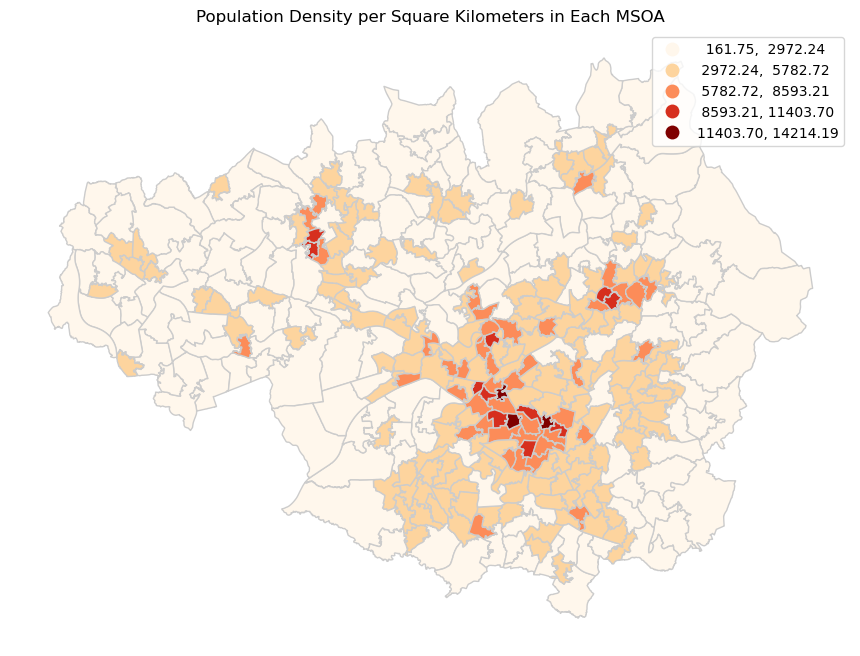

In [69]:
## Plot population density
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa_filtered.plot(column="pop_density",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="equalinterval")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population Density per Square Kilometers in Each MSOA")
ax.axis("off")

### LSOA

In [70]:
lsoa

label   lsoa21cd  \
0     E92000001E12000002E08000001E02001011E01004901  E01004901   
1     E92000001E12000002E08000002E02001030E01005001  E01005001   
2     E92000001E12000002E08000001E02000995E01004840  E01004840   
3     E92000001E12000002E08000002E02001030E01005006  E01005006   
4     E92000001E12000002E08000001E02000986E01004773  E01004773   
...                                             ...        ...   
1764  E92000001E12000002E08000010E02001306E01006410  E01006410   
1765  E92000001E12000002E08000010E02001307E01006400  E01006400   
1766  E92000001E12000002E08000010E02001317E01006331  E01006331   
1767  E92000001E12000002E08000010E02001297E01006397  E01006397   
1768  E92000001E12000002E08000007E02001192E01005866  E01005866   

            lsoa21nm            name  \
0        Bolton 028E     Bolton 028E   
1          Bury 012B       Bury 012B   
2        Bolton 012A     Bolton 012A   
3          Bury 012D       Bury 012D   
4        Bolton 003D     Bolton 003D   
...              ...             ...   
1764      Wigan 020E      Wigan 020E   
1765      Wigan 021D      Wigan 021D   
1766      Wigan 031D      Wigan 031D   
1767      Wigan 011C      Wigan 011C   
1768  Stockport 006C  Stockport 006C   

                                               geometry  
0     POLYGON ((366003.093 406666.688, 366004.412 40...  
1     POLYGON ((375480.348 408593.123, 375481.063 40...  
2     POLYGON ((367374.781 411954.594, 367387.095 41...  
3     POLYGON ((377212.688 410849.500, 377231.906 41...  
4     POLYGON ((371776.559 412463.204, 371825.243 41...  
...                                                 ...  
1764  POLYGON ((357596.954 403017.375, 357616.740 40...  
1765  POLYGON ((356213.760 403792.397, 356213.312 40...  
1766  POLYGON ((367336.970 401009.452, 367340.657 40...  
1767  POLYGON ((354859.312 406046.904, 354861.775 40...  
1768  POLYGON ((388072.366 392494.404, 388070.000 39...  

[1769 rows x 5 columns]

In [71]:
## Keep population data only within Greater Manchester MSOA
## Erase comma in the population data

pop_lsoa = df_pop_2[df_pop_2["LSOA 2021 Code"].isin(lsoa["lsoa21cd"].unique())]
pop_lsoa["Total"] = pop_lsoa["Total"].str.replace(",", "").astype(int)

/tmp/ipykernel_7007/3467373764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["Total"] = pop_lsoa["Total"].str.replace(",", "").astype(int)


In [72]:
pop_lsoa

LAD 2021 Code LAD 2021 Name LSOA 2021 Code   LSOA 2021 Name  Total  F0  \
530       E06000007    Warrington      E01012472  Warrington 001B   1865   0   
533       E06000007    Warrington      E01012475  Warrington 002C   1495   6   
534       E06000007    Warrington      E01012476  Warrington 001C   1578   7   
535       E06000007    Warrington      E01012477  Warrington 001D   1614   3   
573       E06000007    Warrington      E01012517  Warrington 021E   2340  12   
...             ...           ...            ...              ...    ...  ..   
23612     E08000013    St. Helens      E01006885  St. Helens 001D   1327   0   
27554     E08000033    Calderdale      E01010886  Calderdale 022C   1121   5   
27623     E08000033    Calderdale      E01010955  Calderdale 027D   1400   8   
27743     E08000034      Kirklees      E01011075    Kirklees 052C   1452   3   
27846     E08000034      Kirklees      E01011182    Kirklees 058B   1698   9   

       F1  F2  F3  F4  ...  M81  M82  M83  M84  M85  M86  M87  M88  M89  M90  
530    14   5   5  10  ...    5   11    6   11    4    6    0    0    7    4  
533     5  10   5   5  ...    5    5    6    6    0    6    6    0    0    5  
534     5  10   5   5  ...    5    5    6    0    6    0    6    7    0    5  
535     5   5  10   5  ...    5    5    6    6    6    6    0    0    0   10  
573    14  10  10  15  ...    5    5    5    5    0    0    7    0    0    4  
...    ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
23612   5   5   5   5  ...    5    4    0    5    5    0    0    7    0    5  
27554  10   5   0   5  ...    5    0    6    6    0    6    0    0    0    0  
27623   5   5  10   5  ...    0    5    0    0    0    0    0    0    0    0  
27743   0   5   5  10  ...    5    0    0    5    5    6    6    6    0    5  
27846   5   0  10   5  ...    5    5    5    0    5    0    0    0    8    5  

[1769 rows x 187 columns]

In [73]:
## Merge lsoa shapefile with population csv

merge_lsoa = lsoa[["lsoa21cd", "lsoa21nm", "geometry"]]
merge_lsoa = pd.merge(merge_lsoa, pop_lsoa[["Total", "LSOA 2021 Code"]], left_on = "lsoa21cd", right_on = "LSOA 2021 Code")

## Rename "Total" column
merge_lsoa = merge_lsoa.rename(columns={'Total': 'pop_total'})

## Drop redundant column
merge_lsoa.drop("LSOA 2021 Code", axis=1)

lsoa21cd        lsoa21nm  \
0     E01004901     Bolton 028E   
1     E01005001       Bury 012B   
2     E01004840     Bolton 012A   
3     E01005006       Bury 012D   
4     E01004773     Bolton 003D   
...         ...             ...   
1764  E01006410      Wigan 020E   
1765  E01006400      Wigan 021D   
1766  E01006331      Wigan 031D   
1767  E01006397      Wigan 011C   
1768  E01005866  Stockport 006C   

                                               geometry  pop_total  
0     POLYGON ((366003.093 406666.688, 366004.412 40...       1773  
1     POLYGON ((375480.348 408593.123, 375481.063 40...       1228  
2     POLYGON ((367374.781 411954.594, 367387.095 41...       1769  
3     POLYGON ((377212.688 410849.500, 377231.906 41...       2051  
4     POLYGON ((371776.559 412463.204, 371825.243 41...       1985  
...                                                 ...        ...  
1764  POLYGON ((357596.954 403017.375, 357616.740 40...       1261  
1765  POLYGON ((356213.760 403792.397, 356213.312 40...       1982  
1766  POLYGON ((367336.970 401009.452, 367340.657 40...       1501  
1767  POLYGON ((354859.312 406046.904, 354861.775 40...       1058  
1768  POLYGON ((388072.366 392494.404, 388070.000 39...       1648  

[1769 rows x 4 columns]

In [74]:
## Calculate area of each msoa
merge_lsoa["area_sqkm"] = merge_lsoa["geometry"].area / 10**6

## Calculate population density in each msoa
merge_lsoa["pop_density"] = (merge_lsoa["pop_total"] / merge_lsoa["area_sqkm"]).round(2)

In [75]:
merge_lsoa.describe()

pop_total     area_sqkm   pop_density
count  1769.000000  1.769000e+03  1.769000e+03
mean   1684.489542  7.213008e-01  5.633614e+09
std     342.841475  1.510797e+00  2.363821e+11
min     966.000000  1.214027e-10  6.241000e+01
25%    1463.000000  2.589838e-01  2.703240e+03
50%    1610.000000  3.743506e-01  4.372540e+03
75%    1837.000000  6.366062e-01  6.280210e+03
max    3668.000000  2.568316e+01  9.942120e+12

(348941.3699999996, 408808.4300000002, 379171.78500000044, 423031.3149999992)

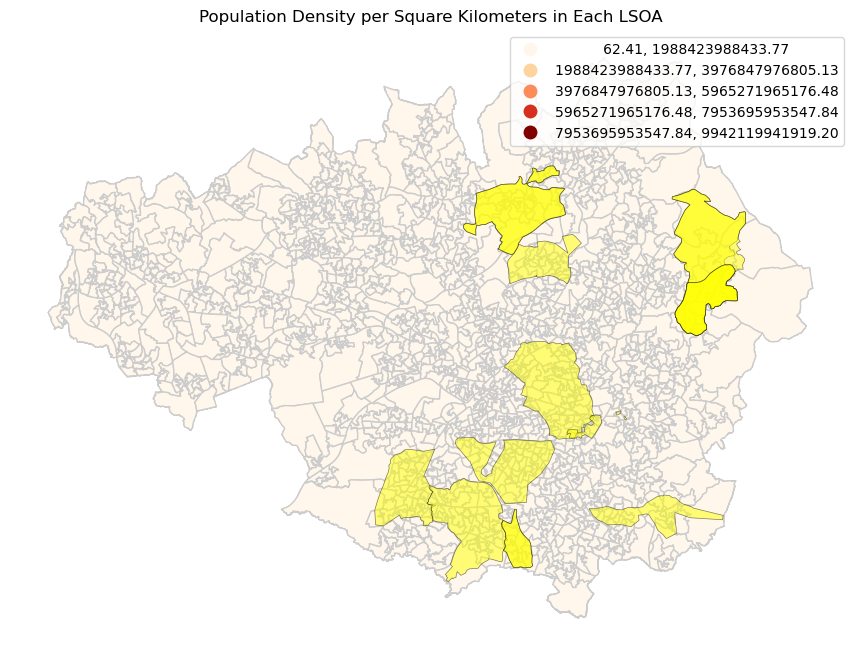

In [76]:
## Plot population density lsoa
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_lsoa.plot(column="pop_density",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="equalinterval")
drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population Density per Square Kilometers in Each LSOA")
ax.axis("off")

## Expect an outlier based on the output

<Axes: >

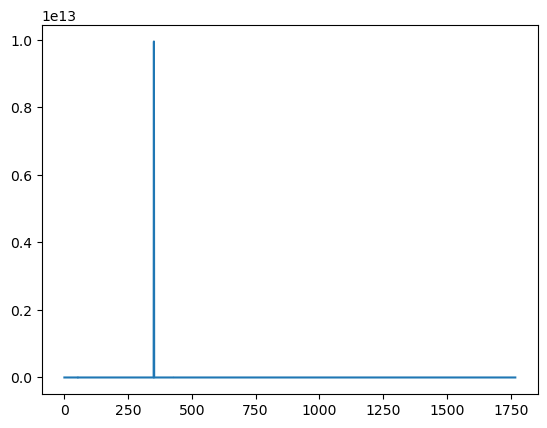

In [77]:
## Finding outlier in the pop_density column

merge_lsoa.pop_density.plot()

In [78]:
outlier = merge_lsoa[merge_lsoa.pop_density > 100000]

In [79]:
outlier.to_file("Data/outlier/outlier.shp")

/tmp/ipykernel_7007/358720671.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  outlier.to_file("Data/outlier/outlier.shp")


In [80]:
## Drop any rows with population density > 100000

merge_lsoa_filtered = merge_lsoa.drop(merge_lsoa[merge_lsoa.pop_density > 100000].index)

In [81]:
merge_lsoa_filtered

lsoa21cd        lsoa21nm  \
0     E01004901     Bolton 028E   
1     E01005001       Bury 012B   
2     E01004840     Bolton 012A   
3     E01005006       Bury 012D   
4     E01004773     Bolton 003D   
...         ...             ...   
1764  E01006410      Wigan 020E   
1765  E01006400      Wigan 021D   
1766  E01006331      Wigan 031D   
1767  E01006397      Wigan 011C   
1768  E01005866  Stockport 006C   

                                               geometry  pop_total  \
0     POLYGON ((366003.093 406666.688, 366004.412 40...       1773   
1     POLYGON ((375480.348 408593.123, 375481.063 40...       1228   
2     POLYGON ((367374.781 411954.594, 367387.095 41...       1769   
3     POLYGON ((377212.688 410849.500, 377231.906 41...       2051   
4     POLYGON ((371776.559 412463.204, 371825.243 41...       1985   
...                                                 ...        ...   
1764  POLYGON ((357596.954 403017.375, 357616.740 40...       1261   
1765  POLYGON ((356213.760 403792.397, 356213.312 40...       1982   
1766  POLYGON ((367336.970 401009.452, 367340.657 40...       1501   
1767  POLYGON ((354859.312 406046.904, 354861.775 40...       1058   
1768  POLYGON ((388072.366 392494.404, 388070.000 39...       1648   

     LSOA 2021 Code  area_sqkm  pop_density  
0         E01004901   0.354363      5003.35  
1         E01005001   0.238302      5153.13  
2         E01004840   4.181101       423.09  
3         E01005006   1.772635      1157.03  
4         E01004773   0.266227      7456.05  
...             ...        ...          ...  
1764      E01006410   0.628715      2005.68  
1765      E01006400   0.569408      3480.81  
1766      E01006331   0.596520      2516.26  
1767      E01006397   0.147755      7160.50  
1768      E01005866   0.288469      5712.92  

[1702 rows x 7 columns]

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

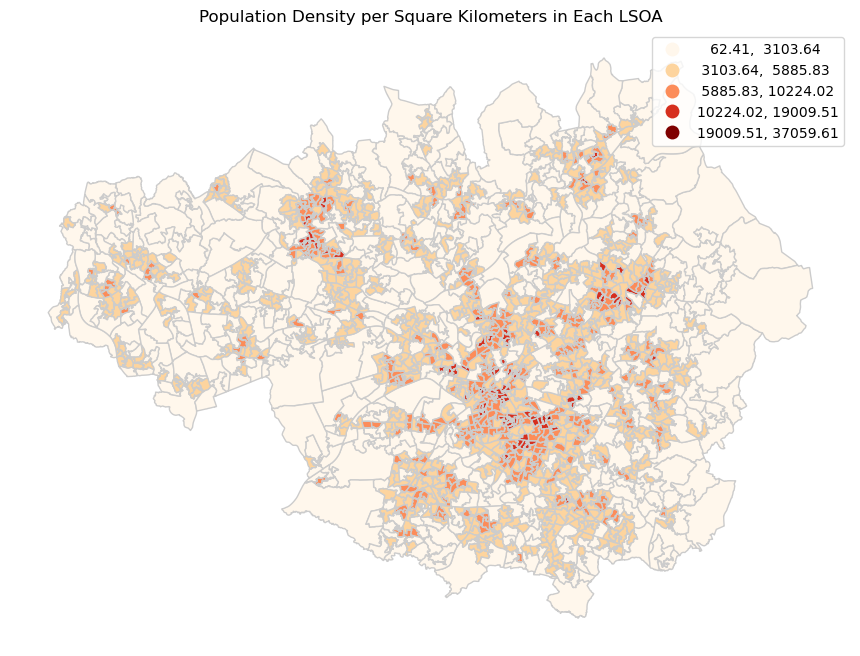

In [82]:
## Plot population density lsoa
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_lsoa_filtered.plot(column="pop_density",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Population Density per Square Kilometers in Each LSOA")
ax.axis("off")

## Bus Stops Density

In [83]:
## Spatial join bus stops to lsoa to count the total number of bus stops per lsoa
lsoa_bus = gpd.sjoin(lsoa, bus_points, how="left", predicate="contains")
bus_counts_lsoa = lsoa_bus.groupby("lsoa21cd").size().reset_index(name="count")

## Merge the total number of bus stops in each lsoa with merge_lsoa
## Calculate population - bus stops ratio
merge_lsoa_filtered = merge_lsoa_filtered.merge(bus_counts_lsoa, on="lsoa21cd")
merge_lsoa_filtered["bus_stops_density"] = merge_lsoa_filtered["count"] / merge_lsoa_filtered["area_sqkm"]

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

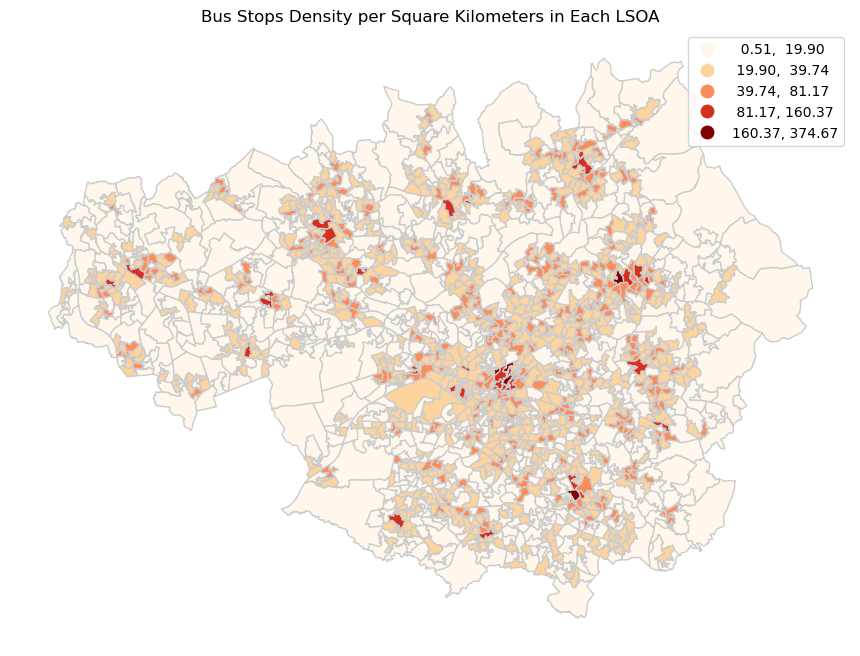

In [84]:
## Plot bus stops density lsoa
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_lsoa_filtered.plot(column="bus_stops_density",
                cmap="OrRd",
                ax=ax,
                edgecolor="0.8",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Bus Stops Density per Square Kilometers in Each LSOA")
ax.axis("off")

## Average Trip Distance

### Bus stops

In [85]:
## Function to calculate the distance to the nearest Transport Infrastructure
def nearest_TI_distance(centroid, TI):
    distances = TI.distance(centroid)
    return distances.min()

## Apply the function to each centroid in the msoa for bus stops
msoa_centroid["nearest_bus_distance"] = msoa_centroid["geometry"].apply(lambda centroid: nearest_TI_distance(centroid, bus_points["geometry"]))

In [86]:
msoa_centroid["nearest_bus_distance"].describe()

count    353.000000
mean     114.989310
std       78.678905
min        3.596957
25%       60.899224
50%       99.644785
75%      153.499078
max      611.354637
Name: nearest_bus_distance, dtype: float64

<Axes: >

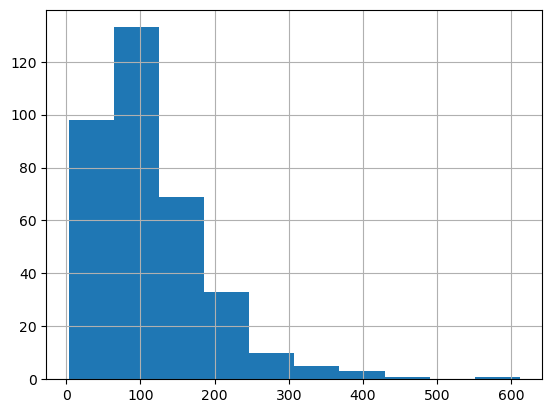

In [87]:
msoa_centroid["nearest_bus_distance"].hist()

In [88]:
## Apply the function to each centroid in the lsoa for bus stops
lsoa_centroid["nearest_bus_distance"] = lsoa_centroid["geometry"].apply(lambda centroid: nearest_TI_distance(centroid, bus_points["geometry"]))

In [89]:
lsoa_centroid

LSOA21CD                              GlobalID  \
0     E01004894  383beb3b-8da0-4477-9ade-4be2ebb0ab15   
1     E01004901  23dcd995-ad83-4f95-b6bc-37d68f343348   
2     E01033218  6ed77315-6e5b-47a9-a152-0ea26b2ea717   
3     E01005001  be241a8f-ce27-4dda-88bd-64b2392f5038   
4     E01004918  e5dc4a4c-f5a2-46f2-a9df-07ea12a7909e   
...         ...                                   ...   
1696  E01006355  4b9523eb-47a5-4ef0-8657-2eaa265b9d57   
1697  E01006304  965b1305-d1c6-4273-8079-af3fc3b1cc02   
1698  E01006408  31fa7bce-1c84-4ce0-bc42-ec95996fc622   
1699  E01006371  a391716f-f834-4263-833e-377d93905bf0   
1700  E01006400  cac1b74b-e228-484c-980d-c861f0f54529   

                           geometry  nearest_bus_distance  
0     POINT (365726.271 406203.286)            121.803924  
1     POINT (366007.383 406571.516)            181.005554  
2     POINT (366176.952 406884.503)            212.304116  
3     POINT (375937.543 408214.672)            140.146741  
4     POINT (375471.213 408031.697)            152.052964  
...                             ...                   ...  
1696  POINT (355811.008 404227.173)            141.739800  
1697  POINT (362820.689 397135.462)             33.228058  
1698  POINT (356979.157 403522.069)             63.651066  
1699  POINT (357558.209 406497.316)            117.821557  
1700  POINT (355978.007 403450.440)            204.007574  

[1701 rows x 4 columns]

### Stations

In [90]:
## Apply the function to each centroid in the lsoa for stations
lsoa_centroid["nearest_station_distance"] = lsoa_centroid["geometry"].apply(lambda centroid: nearest_TI_distance(centroid, station_points["geometry"]))

In [91]:
lsoa_centroid["nearest_station_distance"].describe()

count    1701.000000
mean     1321.435190
std      1029.956418
min        13.167773
25%       607.046073
50%      1060.456548
75%      1692.574623
max      7136.336919
Name: nearest_station_distance, dtype: float64

<Axes: >

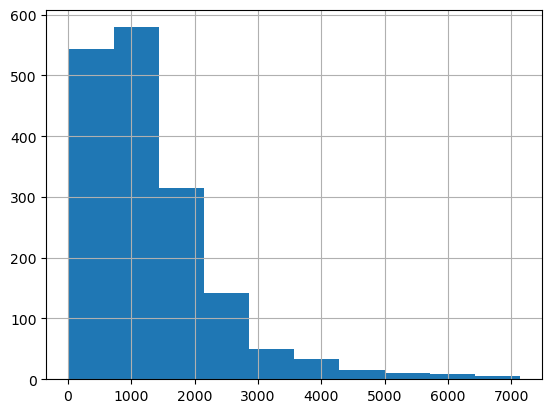

In [92]:
lsoa_centroid["nearest_station_distance"].hist()

In [93]:
lsoa_centroid.rename(columns={"LSOA21CD": "lsoa21cd"}, inplace=True)

### Merge to LSOA boundaries shapefile

In [94]:
## Merge distances to nearest TI to msoa boundaries
merge_lsoa_filtered = pd.merge(merge_lsoa_filtered, lsoa_centroid[["lsoa21cd", "nearest_bus_distance", "nearest_station_distance"]], on="lsoa21cd")

In [95]:
merge_lsoa_filtered

lsoa21cd     lsoa21nm  \
0     E01004901  Bolton 028E   
1     E01005001    Bury 012B   
2     E01004840  Bolton 012A   
3     E01005006    Bury 012D   
4     E01004773  Bolton 003D   
...         ...          ...   
1696  E01006394   Wigan 021B   
1697  E01006410   Wigan 020E   
1698  E01006400   Wigan 021D   
1699  E01006331   Wigan 031D   
1700  E01006397   Wigan 011C   

                                               geometry  pop_total  \
0     POLYGON ((366003.093 406666.688, 366004.412 40...       1773   
1     POLYGON ((375480.348 408593.123, 375481.063 40...       1228   
2     POLYGON ((367374.781 411954.594, 367387.095 41...       1769   
3     POLYGON ((377212.688 410849.500, 377231.906 41...       2051   
4     POLYGON ((371776.559 412463.204, 371825.243 41...       1985   
...                                                 ...        ...   
1696  POLYGON ((355212.000 403394.000, 355230.000 40...       1535   
1697  POLYGON ((357596.954 403017.375, 357616.740 40...       1261   
1698  POLYGON ((356213.760 403792.397, 356213.312 40...       1982   
1699  POLYGON ((367336.970 401009.452, 367340.657 40...       1501   
1700  POLYGON ((354859.312 406046.904, 354861.775 40...       1058   

     LSOA 2021 Code  area_sqkm  pop_density  count  bus_stops_density  \
0         E01004901   0.354363      5003.35      4          11.287876   
1         E01005001   0.238302      5153.13      4          16.785438   
2         E01004840   4.181101       423.09     25           5.979287   
3         E01005006   1.772635      1157.03     26          14.667433   
4         E01004773   0.266227      7456.05      9          33.805782   
...             ...        ...          ...    ...                ...   
1696      E01006394   0.592787      2589.46     14          23.617254   
1697      E01006410   0.628715      2005.68      8          12.724362   
1698      E01006400   0.569408      3480.81      1           1.756210   
1699      E01006331   0.596520      2516.26      6          10.058336   
1700      E01006397   0.147755      7160.50      4          27.071827   

      nearest_bus_distance  nearest_station_distance  
0               181.005554                583.787237  
1               140.146741               2682.823140  
2                98.036347               2153.166001  
3               152.647604               2828.181650  
4                72.796410               1467.288813  
...                    ...                       ...  
1696            139.900807               1215.751499  
1697            164.401335               2090.861678  
1698            204.007574                588.128763  
1699            194.128645               3640.594673  
1700            120.895312               1516.597364  

[1701 rows x 11 columns]

In [96]:
## Drop redundant column
merge_lsoa_filtered = merge_lsoa_filtered.drop("LSOA 2021 Code", axis=1)

In [97]:
## Export msoa boundaries with new columns
merge_lsoa_filtered.to_file("Data/manchester_lsoa_merge/manchester_lsoa_merge.shp")

/tmp/ipykernel_7007/2454973427.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merge_lsoa_filtered.to_file("Data/manchester_lsoa_merge/manchester_lsoa_merge.shp")


(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

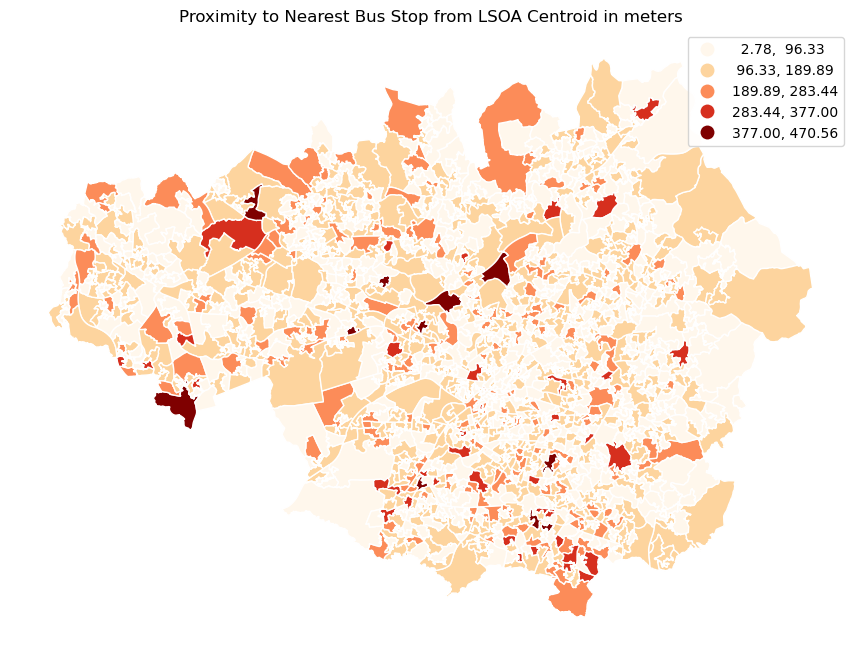

In [98]:
## Plot proximity to bus station
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_lsoa_filtered.plot(column="nearest_bus_distance",
                cmap="OrRd",
                ax=ax,
                edgecolor="1",
                legend=True,
                scheme="equal_interval")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Proximity to Nearest Bus Stop from LSOA Centroid in meters")
ax.axis("off")

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

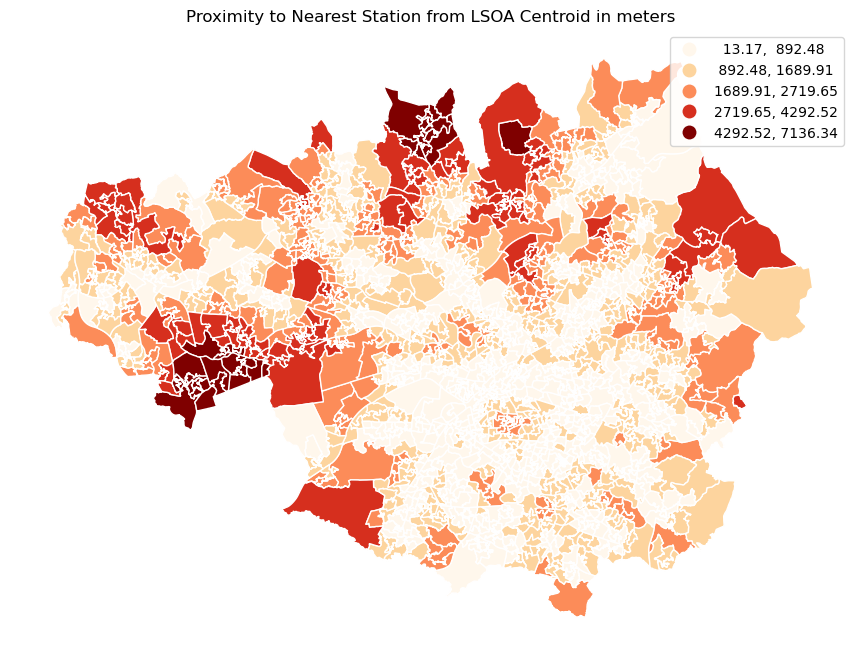

In [99]:
## Plot proximity to bus station
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_lsoa_filtered.plot(column="nearest_station_distance",
                cmap="OrRd",
                ax=ax,
                edgecolor="1",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Proximity to Nearest Station from LSOA Centroid in meters")
ax.axis("off")

### MSOA

In [55]:
pop_msoa.columns

Index(['LAD 2021 Code', 'LAD 2021 Name', 'MSOA 2021 Code', 'MSOA 2021 Name',
       'Total', 'F0 to 4', 'F5 to 9', 'F10 to 14', 'F15 to 19', 'F20 to 24',
       'F25 to 29', 'F30 to 34', 'F35 to 39', 'F40 to 44', 'F45 to 49',
       'F50 to 54', 'F55 to 59', 'F60 to 64', 'F65 to 69', 'F70 to 74',
       'F75 to 79', 'F80 to 84', 'F85 to 89', 'F90 and over', 'M0 to 4',
       'M5 to 9', 'M10 to 14', 'M15 to 19', 'M20 to 24', 'M25 to 29',
       'M30 to 34', 'M35 to 39', 'M40 to 44', 'M45 to 49', 'M50 to 54',
       'M55 to 59', 'M60 to 64', 'M65 to 69', 'M70 to 74', 'M75 to 79',
       'M80 to 84', 'M85 to 89', 'M90 and over'],
      dtype='object')

In [56]:
## List of columns to sum
age_columns = ["M65 to 69", "M70 to 74", "M75 to 79", "M80 to 84", "M85 to 89", "M90 and over", "F65 to 69", "F70 to 74", "F75 to 79", "F80 to 84", "F85 to 89", "F90 and over"]

## Create a new column 'Population 65+' that sums all these columns
pop_msoa["Population 65+"] = pop_msoa[age_columns].sum(axis=1)

## Create a new column 'Elderly Percentage' that calculates the percentage of 'Population 65+' over 'Total'
pop_msoa["Elderly Percentage"] = pop_msoa["Population 65+"] / pop_msoa["Total"] * 100
pop_msoa

/tmp/ipykernel_814/1594564262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_msoa["Population 65+"] = pop_msoa[age_columns].sum(axis=1)
/tmp/ipykernel_814/1594564262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_msoa["Elderly Percentage"] = pop_msoa["Population 65+"] / pop_msoa["Total"] * 100


LAD 2021 Code          LAD 2021 Name MSOA 2021 Code  \
105      E06000007             Warrington      E02002590   
106      E06000007             Warrington      E02002591   
125      E06000007             Warrington      E02002610   
147      E06000008  Blackburn with Darwen      E02002632   
1191     E06000049          Cheshire East      E02003853   
...            ...                    ...            ...   
4785     E08000013             St. Helens      E02001420   
5610     E08000033             Calderdale      E02002265   
5615     E08000033             Calderdale      E02002270   
5667     E08000034               Kirklees      E02002322   
5673     E08000034               Kirklees      E02002328   

                 MSOA 2021 Name  Total  F0 to 4  F5 to 9  F10 to 14 F15 to 19  \
105              Warrington 001   7264      109      167        188       142   
106              Warrington 002   6534      132      162        211       174   
125              Warrington 021  12768      271      395        473       429   
147   Blackburn with Darwen 018   6328      126      181        150       160   
1191          Cheshire East 001   6170      147      135        140       131   
...                         ...    ...      ...      ...        ...       ...   
4785             St. Helens 015  11926      388      344        366       281   
5610             Calderdale 022   5596      115      145        149       150   
5615             Calderdale 027   8473      205      230        287       229   
5667               Kirklees 052   6393      149      160        185       140   
5673               Kirklees 058   7073      137      170        189       193   

     F20 to 24  ... M55 to 59 M60 to 64  M65 to 69  M70 to 74  M75 to 79  \
105        117  ...       343       297        200        181        169   
106        120  ...       267       230        207        180        172   
125        222  ...       484       333        345        331        257   
147        115  ...       321       243        223        216        167   
1191        95  ...       279       210        195        223        162   
...        ...  ...       ...       ...        ...        ...        ...   
4785       312  ...       403       338        246        244        184   
5610       122  ...       212       177        183        177        113   
5615       169  ...       362       295        258        246        189   
5667       125  ...       271       242        203        216        139   
5673       115  ...       286       247        213        231        177   

      M80 to 84  M85 to 89  M90 and over  Population 65+  Elderly Percentage  
105         107         66            23            1553           21.379405  
106         110         70            31            1734           26.538108  
125         196        137            50            2863           22.423246  
147          94         55            10            1541           24.352086  
1191         90         66            23            1612           26.126418  
...         ...        ...           ...             ...                 ...  
4785        126         51            20            1904           15.965118  
5610         65         45            10            1248           22.301644  
5615         95         19            20            1699           20.051930  
5667         66         66            10            1438           22.493352  
5673        106         80            25            1756           24.826806  

[384 rows x 45 columns]

In [57]:
## List of columns to sum
age_columns_child = ["M0 to 4", "M5 to 9", "M10 to 14", "F0 to 4", "F5 to 9", "F10 to 14"]

## Create a new column 'Population Under 15' that sums all these columns
pop_msoa["Population Under 15"] = pop_msoa[age_columns_child].sum(axis=1)

## Create a new column 'Elderly Percentage' that calculates the percentage of 'Population 65+' over 'Total'
pop_msoa["Children Percentage"] = pop_msoa["Population Under 15"] / pop_msoa["Total"] * 100
pop_msoa

/tmp/ipykernel_814/269443056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_msoa["Population Under 15"] = pop_msoa[age_columns_child].sum(axis=1)
/tmp/ipykernel_814/269443056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_msoa["Children Percentage"] = pop_msoa["Population Under 15"] / pop_msoa["Total"] * 100


LAD 2021 Code          LAD 2021 Name MSOA 2021 Code  \
105      E06000007             Warrington      E02002590   
106      E06000007             Warrington      E02002591   
125      E06000007             Warrington      E02002610   
147      E06000008  Blackburn with Darwen      E02002632   
1191     E06000049          Cheshire East      E02003853   
...            ...                    ...            ...   
4785     E08000013             St. Helens      E02001420   
5610     E08000033             Calderdale      E02002265   
5615     E08000033             Calderdale      E02002270   
5667     E08000034               Kirklees      E02002322   
5673     E08000034               Kirklees      E02002328   

                 MSOA 2021 Name  Total  F0 to 4  F5 to 9  F10 to 14 F15 to 19  \
105              Warrington 001   7264      109      167        188       142   
106              Warrington 002   6534      132      162        211       174   
125              Warrington 021  12768      271      395        473       429   
147   Blackburn with Darwen 018   6328      126      181        150       160   
1191          Cheshire East 001   6170      147      135        140       131   
...                         ...    ...      ...      ...        ...       ...   
4785             St. Helens 015  11926      388      344        366       281   
5610             Calderdale 022   5596      115      145        149       150   
5615             Calderdale 027   8473      205      230        287       229   
5667               Kirklees 052   6393      149      160        185       140   
5673               Kirklees 058   7073      137      170        189       193   

     F20 to 24  ... M65 to 69 M70 to 74  M75 to 79  M80 to 84  M85 to 89  \
105        117  ...       200       181        169        107         66   
106        120  ...       207       180        172        110         70   
125        222  ...       345       331        257        196        137   
147        115  ...       223       216        167         94         55   
1191        95  ...       195       223        162         90         66   
...        ...  ...       ...       ...        ...        ...        ...   
4785       312  ...       246       244        184        126         51   
5610       122  ...       183       177        113         65         45   
5615       169  ...       258       246        189         95         19   
5667       125  ...       203       216        139         66         66   
5673       115  ...       213       231        177        106         80   

      M90 and over  Population 65+  Elderly Percentage  Population Under 15  \
105             23            1553           21.379405                  979   
106             31            1734           26.538108                 1009   
125             50            2863           22.423246                 2280   
147             10            1541           24.352086                  921   
1191            23            1612           26.126418                  916   
...            ...             ...                 ...                  ...   
4785            20            1904           15.965118                 2296   
5610            10            1248           22.301644                  859   
5615            20            1699           20.051930                 1449   
5667            10            1438           22.493352                 1032   
5673            25            1756           24.826806                 1047   

      Children Percentage  
105             13.477423  
106             15.442302  
125             17.857143  
147             14.554362  
1191            14.846029  
...                   ...  
4785            19.252054  
5610            15.350250  
5615            17.101381  
5667            16.142656  
5673            14.802771  

[384 rows x 47 columns]

In [58]:
merge_msoa_filtered = pd.merge(merge_msoa_filtered, pop_msoa[["MSOA 2021 Code", "Elderly Percentage", "Children Percentage"]], left_on = "msoa21cd", right_on = "MSOA 2021 Code")
merge_msoa_filtered

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
348        Laithwaite & Marsh Green     NaN   
349                      Leigh West     NaN   
350                   Leigh Central     NaN   
351                        Golborne     NaN   
352               Orrell & Longshaw     NaN   

                                    label   msoa21cd     msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012   Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160  Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158  Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161  Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988   Bolton 005   
..                                    ...        ...          ...   
348  E92000001E12000002E08000010E02001296  E02001296    Wigan 010   
349  E92000001E12000002E08000010E02001319  E02001319    Wigan 033   
350  E92000001E12000002E08000010E02001316  E02001316    Wigan 030   
351  E92000001E12000002E08000010E02001324  E02001324    Wigan 038   
352  E92000001E12000002E08000010E02001304  E02001304    Wigan 018   

            name                                           geometry  \
0     Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1    Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2    Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3    Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4     Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..           ...                                                ...   
348    Wigan 010  POLYGON ((355052.707 407156.809, 355053.403 40...   
349    Wigan 033  POLYGON ((362902.737 401637.602, 362936.247 40...   
350    Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
351    Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
352    Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm  pop_density MSOA 2021 Code  \
0       157.983871             9795.0   1.729171  5664.563014      E02001012   
1       170.162791             7317.0   2.578266  2837.953609      E02001160   
2       134.600000             6057.0   1.206811  5019.012057      E02001158   
3       201.172414             5834.0   2.546342  2291.129449      E02001161   
4       148.344262             9049.0   1.951423  4637.129306      E02000988   
..             ...                ...        ...          ...            ...   
348     101.460674             9030.0   3.388428  2664.952812      E02001296   
349     176.787234             8309.0   4.520452  1838.090531      E02001319   
350      95.012821             7411.0   1.188032  6238.046581      E02001316   
351     185.222222             8335.0   2.817467  2958.331323      E02001324   
352     127.148515            12842.0  10.733309  1196.462373      E02001304   

     Elderly Percentage  Children Percentage  
0             11.781521            26.135784  
1             13.516468            24.695914  
2             16.031038            20.554730  
3             20.191978            15.015427  
4             16.034921            19.714886  
..                  ...                  ...  
348           12.270210            25.459579  
349           16.103021            18.076784  
350           12.157604            18.378087  
351           18.968206            18.044391  
352           23.547734            15.838654  

[353 rows x 14 columns]

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

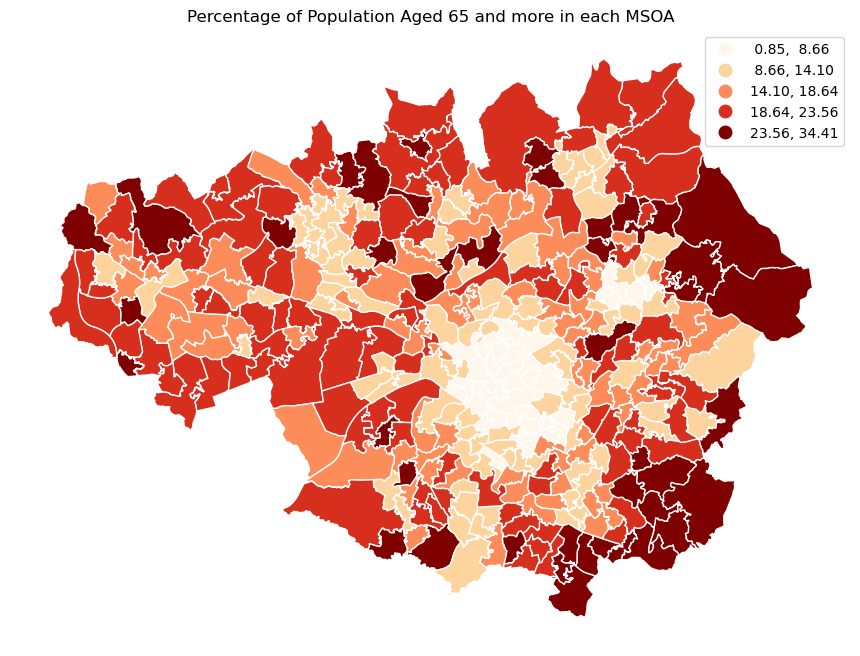

In [59]:
## Plot elderly people percentage
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa_filtered.plot(column="Elderly Percentage",
                cmap="OrRd",
                ax=ax,
                edgecolor="1",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Percentage of Population Aged 65 and more in each MSOA")
ax.axis("off")

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

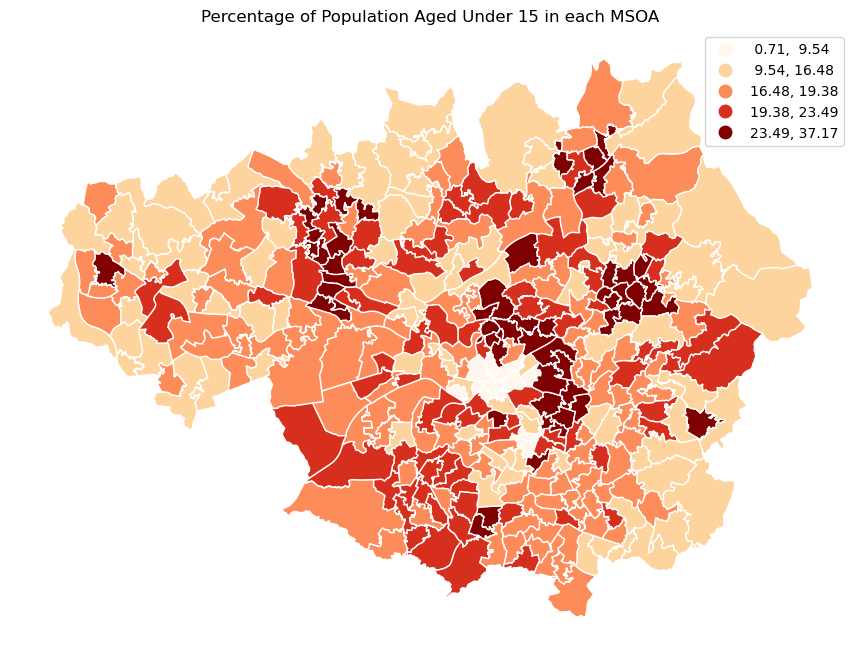

In [60]:
## Plot elderly people percentage
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa_filtered.plot(column="Children Percentage",
                cmap="OrRd",
                ax=ax,
                edgecolor="1",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Percentage of Population Aged Under 15 in each MSOA")
ax.axis("off")

### Household with 1 or more disabled people and no car

In [61]:
car_disabled

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                                E01000001            City of London 001A   
1                                E01000001            City of London 001A   
2                                E01000001            City of London 001A   
3                                E01000001            City of London 001A   
4                                E01000001            City of London 001A   
...                                    ...                            ...   
428011                           W01002040         Vale of Glamorgan 015F   
428012                           W01002040         Vale of Glamorgan 015F   
428013                           W01002040         Vale of Glamorgan 015F   
428014                           W01002040         Vale of Glamorgan 015F   
428015                           W01002040         Vale of Glamorgan 015F   

        Number of disabled people in household (3 categories) Code  \
0                                                      -8            
1                                                      -8            
2                                                      -8            
3                                                      -8            
4                                                       0            
...                                                   ...            
428011                                                  0            
428012                                                  1            
428013                                                  1            
428014                                                  1            
428015                                                  1            

       Number of disabled people in household (3 categories)  \
0                                          Does not apply      
1                                          Does not apply      
2                                          Does not apply      
3                                          Does not apply      
4       No people disabled under the Equality Act in h...      
...                                                   ...      
428011  No people disabled under the Equality Act in h...      
428012  1 or more people disabled under the Equality A...      
428013  1 or more people disabled under the Equality A...      
428014  1 or more people disabled under the Equality A...      
428015  1 or more people disabled under the Equality A...      

        Car or van availability (4 categories) Code  \
0                                                -8   
1                                                 0   
2                                                 1   
3                                                 2   
4                                                -8   
...                                             ...   
428011                                            2   
428012                                           -8   
428013                                            0   
428014                                            1   
428015                                            2   

       Car or van availability (4 categories)  Observation  
0                              Does not apply            0  
1                No cars or vans in household            0  
2                   1 car or van in household            0  
3         2 or more cars or vans in household            0  
4                              Does not apply            0  
...                                       ...          ...  
428011    2 or more cars or vans in household          264  
428012                         Does not apply            0  
428013           No cars or vans in household           55  
428014              1 car or van in household          120  
428015    2 or more cars or vans in household           51  

[428016 rows x 7 columns]

In [62]:
## Filter only rows which fulfil the condition of 1 or more disabled people in the household AND having no car
car_disabled_lsoa = car_disabled[(car_disabled["Number of disabled people in household (3 categories) Code"] == 1) & (car_disabled["Car or van availability (4 categories) Code"] == 0)]

## Filter only in Greater Manchester
car_disabled_lsoa = car_disabled_lsoa[car_disabled_lsoa["Lower layer Super Output Areas Code"].isin(merge_lsoa_filtered["lsoa21cd"].unique())]

In [63]:
car_disabled_lsoa

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
54081                            E01004766                    Bolton 005A   
54093                            E01004767                    Bolton 005B   
54105                            E01004768                    Bolton 001A   
54117                            E01004769                    Bolton 003A   
54129                            E01004770                    Bolton 003B   
...                                    ...                            ...   
386145                           E01034138                Manchester 064B   
387237                           E01034232                    Oldham 036A   
387249                           E01034233                    Oldham 036B   
387261                           E01034234                  Rochdale 008H   
387273                           E01034235                  Rochdale 008I   

        Number of disabled people in household (3 categories) Code  \
54081                                                   1            
54093                                                   1            
54105                                                   1            
54117                                                   1            
54129                                                   1            
...                                                   ...            
386145                                                  1            
387237                                                  1            
387249                                                  1            
387261                                                  1            
387273                                                  1            

       Number of disabled people in household (3 categories)  \
54081   1 or more people disabled under the Equality A...      
54093   1 or more people disabled under the Equality A...      
54105   1 or more people disabled under the Equality A...      
54117   1 or more people disabled under the Equality A...      
54129   1 or more people disabled under the Equality A...      
...                                                   ...      
386145  1 or more people disabled under the Equality A...      
387237  1 or more people disabled under the Equality A...      
387249  1 or more people disabled under the Equality A...      
387261  1 or more people disabled under the Equality A...      
387273  1 or more people disabled under the Equality A...      

        Car or van availability (4 categories) Code  \
54081                                             0   
54093                                             0   
54105                                             0   
54117                                             0   
54129                                             0   
...                                             ...   
386145                                            0   
387237                                            0   
387249                                            0   
387261                                            0   
387273                                            0   

       Car or van availability (4 categories)  Observation  
54081            No cars or vans in household          148  
54093            No cars or vans in household           98  
54105            No cars or vans in household           15  
54117            No cars or vans in household           33  
54129            No cars or vans in household           29  
...                                       ...          ...  
386145           No cars or vans in household           82  
387237           No cars or vans in household           70  
387249           No cars or vans in household           67  
387261           No cars or vans in household           57  
387273           No cars or vans in household           69  

[1701 rows x 7 columns]

In [64]:
merge_lsoa_filtered = pd.merge(merge_lsoa_filtered, car_disabled_lsoa[["Lower layer Super Output Areas Code", "Observation"]], left_on="lsoa21cd", right_on="Lower layer Super Output Areas Code")
merge_lsoa_filtered = merge_lsoa_filtered.rename(columns={"Observation": "Disabled-No Car Household"})

In [65]:
merge_lsoa_filtered

lsoa21cd     lsoa21nm  \
0     E01004901  Bolton 028E   
1     E01005001    Bury 012B   
2     E01004840  Bolton 012A   
3     E01005006    Bury 012D   
4     E01004773  Bolton 003D   
...         ...          ...   
1696  E01006394   Wigan 021B   
1697  E01006410   Wigan 020E   
1698  E01006400   Wigan 021D   
1699  E01006331   Wigan 031D   
1700  E01006397   Wigan 011C   

                                               geometry  pop_total  area_sqkm  \
0     POLYGON ((366003.093 406666.688, 366004.412 40...       1773   0.354363   
1     POLYGON ((375480.348 408593.123, 375481.063 40...       1228   0.238302   
2     POLYGON ((367374.781 411954.594, 367387.095 41...       1769   4.181101   
3     POLYGON ((377212.688 410849.500, 377231.906 41...       2051   1.772635   
4     POLYGON ((371776.559 412463.204, 371825.243 41...       1985   0.266227   
...                                                 ...        ...        ...   
1696  POLYGON ((355212.000 403394.000, 355230.000 40...       1535   0.592787   
1697  POLYGON ((357596.954 403017.375, 357616.740 40...       1261   0.628715   
1698  POLYGON ((356213.760 403792.397, 356213.312 40...       1982   0.569408   
1699  POLYGON ((367336.970 401009.452, 367340.657 40...       1501   0.596520   
1700  POLYGON ((354859.312 406046.904, 354861.775 40...       1058   0.147755   

      pop_density  count  bus_stops_density  nearest_bus_distance  \
0         5003.35      4          11.287876            181.005554   
1         5153.13      4          16.785438            140.146741   
2          423.09     25           5.979287             98.036347   
3         1157.03     26          14.667433            152.647604   
4         7456.05      9          33.805782             72.796410   
...           ...    ...                ...                   ...   
1696      2589.46     14          23.617254            139.900807   
1697      2005.68      8          12.724362            164.401335   
1698      3480.81      1           1.756210            204.007574   
1699      2516.26      6          10.058336            194.128645   
1700      7160.50      4          27.071827            120.895312   

      nearest_station_distance Lower layer Super Output Areas Code  \
0                   583.787237                           E01004901   
1                  2682.823140                           E01005001   
2                  2153.166001                           E01004840   
3                  2828.181650                           E01005006   
4                  1467.288813                           E01004773   
...                        ...                                 ...   
1696               1215.751499                           E01006394   
1697               2090.861678                           E01006410   
1698                588.128763                           E01006400   
1699               3640.594673                           E01006331   
1700               1516.597364                           E01006397   

      Disabled-No Car Household  
0                            39  
1                            14  
2                            56  
3                            60  
4                            77  
...                         ...  
1696                         36  
1697                         30  
1698                         15  
1699                         20  
1700                        100  

[1701 rows x 12 columns]

In [66]:
df_avg_income

MSOA code          MSOA name Local authority code Local authority name  \
0     E02004297  County Durham 001            E06000047        County Durham   
1     E02004290  County Durham 002            E06000047        County Durham   
2     E02004298  County Durham 003            E06000047        County Durham   
3     E02004299  County Durham 004            E06000047        County Durham   
4     E02004291  County Durham 005            E06000047        County Durham   
...         ...                ...                  ...                  ...   
7196  W02000362        Newport 016            W06000022              Newport   
7197  W02000363        Newport 017            W06000022              Newport   
7198  W02000364        Newport 018            W06000022              Newport   
7199  W02000365        Newport 019            W06000022              Newport   
7200  W02000366        Newport 020            W06000022              Newport   

     Region code Region name Total annual income Upper confidence limit  \
0      E12000001  North East              41,400                 49,100   
1      E12000001  North East              41,100                 48,800   
2      E12000001  North East              44,300                 52,500   
3      E12000001  North East              35,400                 42,000   
4      E12000001  North East              34,500                 40,900   
...          ...         ...                 ...                    ...   
7196   W92000004       Wales              44,500                 52,900   
7197   W92000004       Wales              35,600                 42,200   
7198   W92000004       Wales              35,100                 41,800   
7199   W92000004       Wales              37,100                 44,200   
7200   W92000004       Wales              51,500                 61,400   

     Lower confidence limit Confidence interval  
0                    34,900              14,200  
1                    34,700              14,100  
2                    37,300              15,200  
3                    29,900              12,100  
4                    29,100              11,800  
...                     ...                 ...  
7196                 37,500              15,400  
7197                 30,100              12,100  
7198                 29,400              12,400  
7199                 31,200              13,000  
7200                 43,300              18,100  

[7201 rows x 10 columns]

In [67]:
merge_msoa_filtered

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
348        Laithwaite & Marsh Green     NaN   
349                      Leigh West     NaN   
350                   Leigh Central     NaN   
351                        Golborne     NaN   
352               Orrell & Longshaw     NaN   

                                    label   msoa21cd     msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012   Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160  Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158  Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161  Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988   Bolton 005   
..                                    ...        ...          ...   
348  E92000001E12000002E08000010E02001296  E02001296    Wigan 010   
349  E92000001E12000002E08000010E02001319  E02001319    Wigan 033   
350  E92000001E12000002E08000010E02001316  E02001316    Wigan 030   
351  E92000001E12000002E08000010E02001324  E02001324    Wigan 038   
352  E92000001E12000002E08000010E02001304  E02001304    Wigan 018   

            name                                           geometry  \
0     Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1    Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2    Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3    Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4     Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..           ...                                                ...   
348    Wigan 010  POLYGON ((355052.707 407156.809, 355053.403 40...   
349    Wigan 033  POLYGON ((362902.737 401637.602, 362936.247 40...   
350    Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
351    Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
352    Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm  pop_density MSOA 2021 Code  \
0       157.983871             9795.0   1.729171  5664.563014      E02001012   
1       170.162791             7317.0   2.578266  2837.953609      E02001160   
2       134.600000             6057.0   1.206811  5019.012057      E02001158   
3       201.172414             5834.0   2.546342  2291.129449      E02001161   
4       148.344262             9049.0   1.951423  4637.129306      E02000988   
..             ...                ...        ...          ...            ...   
348     101.460674             9030.0   3.388428  2664.952812      E02001296   
349     176.787234             8309.0   4.520452  1838.090531      E02001319   
350      95.012821             7411.0   1.188032  6238.046581      E02001316   
351     185.222222             8335.0   2.817467  2958.331323      E02001324   
352     127.148515            12842.0  10.733309  1196.462373      E02001304   

     Elderly Percentage  Children Percentage  
0             11.781521            26.135784  
1             13.516468            24.695914  
2             16.031038            20.554730  
3             20.191978            15.015427  
4             16.034921            19.714886  
..                  ...                  ...  
348           12.270210            25.459579  
349           16.103021            18.076784  
350           12.157604            18.378087  
351           18.968206            18.044391  
352           23.547734            15.838654  

[353 rows x 14 columns]

In [68]:
## Filter only rows within Greater Manchester msoa are kept
## avg_income_msoa = df_avg_income[df_avg_income["MSOA code"].isin(merge_msoa_filtered["msoa21cd"].unique())]

## Select the columns which commas will be deleted
columns_comma = ["Total annual income", "Upper confidence limit", "Lower confidence limit", "Confidence interval"]

## Remove commas and convert to integer
for c in columns_comma:
    df_avg_income[c] = df_avg_income[c].str.replace(",", "").astype(int)

In [69]:
df_avg_income

MSOA code          MSOA name Local authority code Local authority name  \
0     E02004297  County Durham 001            E06000047        County Durham   
1     E02004290  County Durham 002            E06000047        County Durham   
2     E02004298  County Durham 003            E06000047        County Durham   
3     E02004299  County Durham 004            E06000047        County Durham   
4     E02004291  County Durham 005            E06000047        County Durham   
...         ...                ...                  ...                  ...   
7196  W02000362        Newport 016            W06000022              Newport   
7197  W02000363        Newport 017            W06000022              Newport   
7198  W02000364        Newport 018            W06000022              Newport   
7199  W02000365        Newport 019            W06000022              Newport   
7200  W02000366        Newport 020            W06000022              Newport   

     Region code Region name  Total annual income  Upper confidence limit  \
0      E12000001  North East                41400                   49100   
1      E12000001  North East                41100                   48800   
2      E12000001  North East                44300                   52500   
3      E12000001  North East                35400                   42000   
4      E12000001  North East                34500                   40900   
...          ...         ...                  ...                     ...   
7196   W92000004       Wales                44500                   52900   
7197   W92000004       Wales                35600                   42200   
7198   W92000004       Wales                35100                   41800   
7199   W92000004       Wales                37100                   44200   
7200   W92000004       Wales                51500                   61400   

      Lower confidence limit  Confidence interval  
0                      34900                14200  
1                      34700                14100  
2                      37300                15200  
3                      29900                12100  
4                      29100                11800  
...                      ...                  ...  
7196                   37500                15400  
7197                   30100                12100  
7198                   29400                12400  
7199                   31200                13000  
7200                   43300                18100  

[7201 rows x 10 columns]

In [70]:
merge_msoa_filtered = pd.merge(merge_msoa_filtered, df_avg_income[["MSOA code", "Total annual income"]], left_on="msoa21cd", right_on="MSOA code", how="left")

In [71]:
merge_msoa_filtered

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
348        Laithwaite & Marsh Green     NaN   
349                      Leigh West     NaN   
350                   Leigh Central     NaN   
351                        Golborne     NaN   
352               Orrell & Longshaw     NaN   

                                    label   msoa21cd     msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012   Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160  Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158  Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161  Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988   Bolton 005   
..                                    ...        ...          ...   
348  E92000001E12000002E08000010E02001296  E02001296    Wigan 010   
349  E92000001E12000002E08000010E02001319  E02001319    Wigan 033   
350  E92000001E12000002E08000010E02001316  E02001316    Wigan 030   
351  E92000001E12000002E08000010E02001324  E02001324    Wigan 038   
352  E92000001E12000002E08000010E02001304  E02001304    Wigan 018   

            name                                           geometry  \
0     Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1    Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2    Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3    Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4     Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..           ...                                                ...   
348    Wigan 010  POLYGON ((355052.707 407156.809, 355053.403 40...   
349    Wigan 033  POLYGON ((362902.737 401637.602, 362936.247 40...   
350    Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
351    Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
352    Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm  pop_density MSOA 2021 Code  \
0       157.983871             9795.0   1.729171  5664.563014      E02001012   
1       170.162791             7317.0   2.578266  2837.953609      E02001160   
2       134.600000             6057.0   1.206811  5019.012057      E02001158   
3       201.172414             5834.0   2.546342  2291.129449      E02001161   
4       148.344262             9049.0   1.951423  4637.129306      E02000988   
..             ...                ...        ...          ...            ...   
348     101.460674             9030.0   3.388428  2664.952812      E02001296   
349     176.787234             8309.0   4.520452  1838.090531      E02001319   
350      95.012821             7411.0   1.188032  6238.046581      E02001316   
351     185.222222             8335.0   2.817467  2958.331323      E02001324   
352     127.148515            12842.0  10.733309  1196.462373      E02001304   

     Elderly Percentage  Children Percentage  MSOA code  Total annual income  
0             11.781521            26.135784  E02001012              38400.0  
1             13.516468            24.695914  E02001160              37400.0  
2             16.031038            20.554730  E02001158              31300.0  
3             20.191978            15.015427  E02001161              39600.0  
4             16.034921            19.714886  E02000988              35300.0  
..                  ...                  ...        ...                  ...  
348           12.270210            25.459579  E02001296              29800.0  
349           16.103021            18.076784  E02001319              34900.0  
350           12.157604            18.378087  E02001316              32600.0  
351           18.968206         

In [72]:
merge_msoa_filtered[merge_msoa_filtered["Total annual income"].isna()]

hclnm  hclnmw  \
103                         Broughton West     NaN   
135                           Ordsall East     NaN   
147                           Ordsall West     NaN   
148  University, Crescent & Adelphi Street     NaN   
162                         Longsight East     NaN   
166   Miles Platting & New Islington North     NaN   
173                Greengate & Blackfriars     NaN   
179         New Islington South & Bradford     NaN   
205               Levenshulme North & East     NaN   
219                         Broughton East     NaN   
225                          Salford Quays     NaN   
230                                Werneth     NaN   
237                                Coppice     NaN   

                                    label   msoa21cd        msoa21nm  \
103  E92000001E12000002E08000006E02006958  E02006958     Salford 032   
135  E92000001E12000002E08000006E02006962  E02006962     Salford 036   
147  E92000001E12000002E08000006E02006961  E02006961     Salford 035   
148  E92000001E12000002E08000006E02006960  E02006960     Salford 034   
162  E92000001E12000002E08000003E02006985  E02006985  Manchester 063   
166  E92000001E12000002E08000003E02006983  E02006983  Manchester 061   
173  E92000001E12000002E08000006E02006959  E02006959     Salford 033   
179  E92000001E12000002E08000003E02006984  E02006984  Manchester 062   
205  E92000001E12000002E08000003E02006986  E02006986  Manchester 064   
219  E92000001E12000002E08000006E02006957  E02006957     Salford 031   
225  E92000001E12000002E08000006E02006963  E02006963     Salford 037   
230  E92000001E12000002E08000004E02007000  E02007000      Oldham 036   
237  E92000001E12000002E08000004E02007001  E02007001      Oldham 037   

               name                                           geometry  \
103     Salford 032  POLYGON ((382737.790 401280.492, 382742.157 40...   
135     Salford 036  POLYGON ((382630.694 397991.859, 382668.594 39...   
147     Salford 035  POLYGON ((382059.771 398039.794, 382034.614 39...   
148     Salford 034  POLYGON ((382382.589 399864.740, 382401.425 39...   
162  Manchester 063  POLYGON ((387024.154 395741.744, 387032.108 39...   
166  Manchester 061  POLYGON ((386483.614 399445.241, 386538.039 39...   
173     Salford 033  POLYGON ((383146.012 400111.636, 383169.027 40...   
179  Manchester 062  POLYGON ((386520.856 399203.568, 386525.397 39...   
205  Manchester 064  POLYGON ((387760.224 395271.762, 387759.453 39...   
219     Salford 031  POLYGON ((383822.573 400953.697, 383828.750 40...   
225     Salford 037  POLYGON ((380994.813 397464.531, 381025.842 39...   
230      Oldham 036  POLYGON ((391649.412 404633.752, 391652.778 40...   
237      Oldham 037  POLYGON ((392014.147 404401.697, 392014.509 40...   

     bus_pop_ratio  station_pop_ratio  area_sqkm   pop_density MSOA 2021 Code  \
103     335.583333             8054.0   0.997707   8072.508177      E02006958   
135     211.958333             5087.0   0.575806   8834.573048      E02006962   
147     139.708333             6706.0   1.510238   4440.358608      E02006961   
148     149.677419             4640.0   2.250259   4123.968902      E02006960   
162     404.434783             9302.0   0.701227  13265.320205      E02006985   
166     179.897436             7016.0   1.158135   6058.015716      E02006983   
173     144.472727             7946.0   1.016215   7819.214123      E02006959   
179     100.981818             2777.0   1.190277   4666.142145      E02006984   
205     315.000000             6300.0   0.729727   8633.361119      E02006986   
219     219.394737             8337.0   0.750739  11105.061273      E02006957   
225      83.314286              972.0   0.997471   5846.786094      E02006963   
230     231.969697             7655.0   0.813101   9414.575116      E02007000   
237     356.500000             8556.0   0.927607   9223.733610      E02007001   

     Elderly Percentage  Children Percentage MSOA code  Total annual income  
103            7.5366

(348941.3704999996, 408808.4195000004, 379172.46184999973, 423031.2691500009)

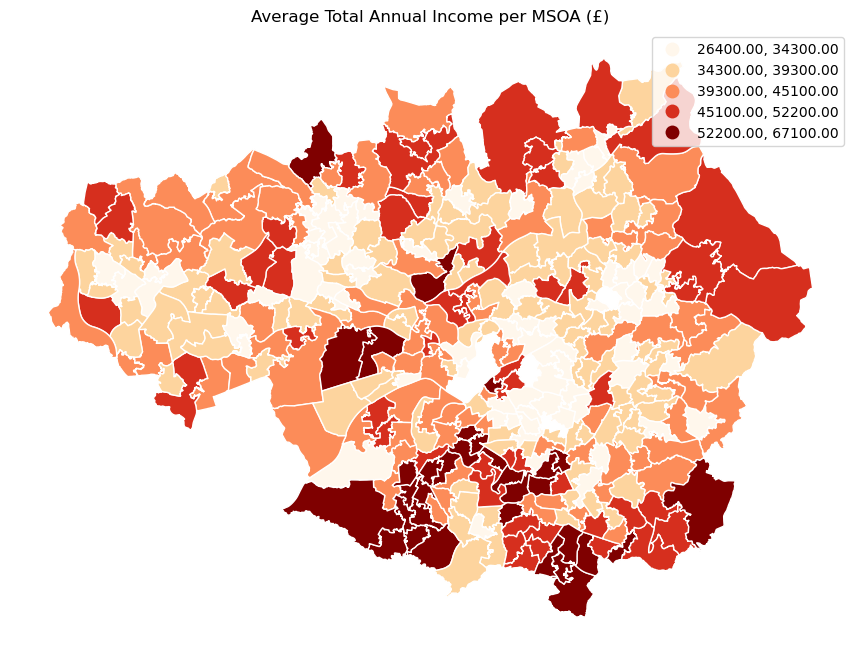

In [73]:
## Plot average total annual income per msoa
fig, ax = plt.subplots(1,1, figsize=(12,8))

merge_msoa_filtered.plot(column="Total annual income",
                cmap="OrRd",
                ax=ax,
                edgecolor="1",
                legend=True,
                scheme="natural_breaks")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, edgecolor="black", linewidth=0.5)

ax.set_title("Average Total Annual Income per MSOA (£)")
ax.axis("off")

## There must be na values in several msoa (particularly in the center) from the average income data

## Data cleaning for main gdf

In [74]:
merge_msoa_filtered

hclnm  hclnmw  \
0                      Harper Green     NaN   
1               Little Hulton South     NaN   
2                Walkden North West     NaN   
3                           Clifton     NaN   
4    Astley Bridge & Waters Meeting     NaN   
..                              ...     ...   
348        Laithwaite & Marsh Green     NaN   
349                      Leigh West     NaN   
350                   Leigh Central     NaN   
351                        Golborne     NaN   
352               Orrell & Longshaw     NaN   

                                    label   msoa21cd     msoa21nm  \
0    E92000001E12000002E08000001E02001012  E02001012   Bolton 029   
1    E92000001E12000002E08000006E02001160  E02001160  Salford 004   
2    E92000001E12000002E08000006E02001158  E02001158  Salford 002   
3    E92000001E12000002E08000006E02001161  E02001161  Salford 005   
4    E92000001E12000002E08000001E02000988  E02000988   Bolton 005   
..                                    ...        ...          ...   
348  E92000001E12000002E08000010E02001296  E02001296    Wigan 010   
349  E92000001E12000002E08000010E02001319  E02001319    Wigan 033   
350  E92000001E12000002E08000010E02001316  E02001316    Wigan 030   
351  E92000001E12000002E08000010E02001324  E02001324    Wigan 038   
352  E92000001E12000002E08000010E02001304  E02001304    Wigan 018   

            name                                           geometry  \
0     Bolton 029  POLYGON ((372562.729 407282.792, 372568.000 40...   
1    Salford 004  POLYGON ((370972.805 404195.847, 370963.908 40...   
2    Salford 002  POLYGON ((372738.388 404557.501, 372749.747 40...   
3    Salford 005  POLYGON ((377488.595 404381.281, 377513.185 40...   
4     Bolton 005  POLYGON ((370954.000 412542.000, 370972.794 41...   
..           ...                                                ...   
348    Wigan 010  POLYGON ((355052.707 407156.809, 355053.403 40...   
349    Wigan 033  POLYGON ((362902.737 401637.602, 362936.247 40...   
350    Wigan 030  POLYGON ((365747.481 401370.251, 365751.000 40...   
351    Wigan 038  POLYGON ((359638.600 397469.500, 359586.600 39...   
352    Wigan 018  POLYGON ((356526.100 399734.200, 356366.900 39...   

     bus_pop_ratio  station_pop_ratio  area_sqkm  pop_density MSOA 2021 Code  \
0       157.983871             9795.0   1.729171  5664.563014      E02001012   
1       170.162791             7317.0   2.578266  2837.953609      E02001160   
2       134.600000             6057.0   1.206811  5019.012057      E02001158   
3       201.172414             5834.0   2.546342  2291.129449      E02001161   
4       148.344262             9049.0   1.951423  4637.129306      E02000988   
..             ...                ...        ...          ...            ...   
348     101.460674             9030.0   3.388428  2664.952812      E02001296   
349     176.787234             8309.0   4.520452  1838.090531      E02001319   
350      95.012821             7411.0   1.188032  6238.046581      E02001316   
351     185.222222             8335.0   2.817467  2958.331323      E02001324   
352     127.148515            12842.0  10.733309  1196.462373      E02001304   

     Elderly Percentage  Children Percentage  MSOA code  Total annual income  
0             11.781521            26.135784  E02001012              38400.0  
1             13.516468            24.695914  E02001160              37400.0  
2             16.031038            20.554730  E02001158              31300.0  
3             20.191978            15.015427  E02001161              39600.0  
4             16.034921            19.714886  E02000988              35300.0  
..                  ...                  ...        ...                  ...  
348           12.270210            25.459579  E02001296              29800.0  
349           16.103021            18.076784  E02001319              34900.0  
350           12.157604            18.378087  E02001316              32600.0  
351           18.968206         

In [75]:
msoa_supply = merge_msoa_filtered[["msoa21cd", "msoa21nm", "bus_pop_ratio", "station_pop_ratio"]]
msoa_supply

msoa21cd     msoa21nm  bus_pop_ratio  station_pop_ratio
0    E02001012   Bolton 029     157.983871             9795.0
1    E02001160  Salford 004     170.162791             7317.0
2    E02001158  Salford 002     134.600000             6057.0
3    E02001161  Salford 005     201.172414             5834.0
4    E02000988   Bolton 005     148.344262             9049.0
..         ...          ...            ...                ...
348  E02001296    Wigan 010     101.460674             9030.0
349  E02001319    Wigan 033     176.787234             8309.0
350  E02001316    Wigan 030      95.012821             7411.0
351  E02001324    Wigan 038     185.222222             8335.0
352  E02001304    Wigan 018     127.148515            12842.0

[353 rows x 4 columns]

In [76]:
msoa_demand = merge_msoa_filtered[["msoa21cd", "msoa21nm", "pop_density", "Elderly Percentage", "Children Percentage", "Total annual income"]]
msoa_demand

msoa21cd     msoa21nm  pop_density  Elderly Percentage  \
0    E02001012   Bolton 029  5664.563014           11.781521   
1    E02001160  Salford 004  2837.953609           13.516468   
2    E02001158  Salford 002  5019.012057           16.031038   
3    E02001161  Salford 005  2291.129449           20.191978   
4    E02000988   Bolton 005  4637.129306           16.034921   
..         ...          ...          ...                 ...   
348  E02001296    Wigan 010  2664.952812           12.270210   
349  E02001319    Wigan 033  1838.090531           16.103021   
350  E02001316    Wigan 030  6238.046581           12.157604   
351  E02001324    Wigan 038  2958.331323           18.968206   
352  E02001304    Wigan 018  1196.462373           23.547734   

     Children Percentage  Total annual income  
0              26.135784              38400.0  
1              24.695914              37400.0  
2              20.554730              31300.0  
3              15.015427              39600.0  
4              19.714886              35300.0  
..                   ...                  ...  
348            25.459579              29800.0  
349            18.076784              34900.0  
350            18.378087              32600.0  
351            18.044391              35900.0  
352            15.838654              43800.0  

[353 rows x 6 columns]

In [77]:
merge_lsoa_filtered

lsoa21cd     lsoa21nm  \
0     E01004901  Bolton 028E   
1     E01005001    Bury 012B   
2     E01004840  Bolton 012A   
3     E01005006    Bury 012D   
4     E01004773  Bolton 003D   
...         ...          ...   
1696  E01006394   Wigan 021B   
1697  E01006410   Wigan 020E   
1698  E01006400   Wigan 021D   
1699  E01006331   Wigan 031D   
1700  E01006397   Wigan 011C   

                                               geometry  pop_total  area_sqkm  \
0     POLYGON ((366003.093 406666.688, 366004.412 40...       1773   0.354363   
1     POLYGON ((375480.348 408593.123, 375481.063 40...       1228   0.238302   
2     POLYGON ((367374.781 411954.594, 367387.095 41...       1769   4.181101   
3     POLYGON ((377212.688 410849.500, 377231.906 41...       2051   1.772635   
4     POLYGON ((371776.559 412463.204, 371825.243 41...       1985   0.266227   
...                                                 ...        ...        ...   
1696  POLYGON ((355212.000 403394.000, 355230.000 40...       1535   0.592787   
1697  POLYGON ((357596.954 403017.375, 357616.740 40...       1261   0.628715   
1698  POLYGON ((356213.760 403792.397, 356213.312 40...       1982   0.569408   
1699  POLYGON ((367336.970 401009.452, 367340.657 40...       1501   0.596520   
1700  POLYGON ((354859.312 406046.904, 354861.775 40...       1058   0.147755   

      pop_density  count  bus_stops_density  nearest_bus_distance  \
0         5003.35      4          11.287876            181.005554   
1         5153.13      4          16.785438            140.146741   
2          423.09     25           5.979287             98.036347   
3         1157.03     26          14.667433            152.647604   
4         7456.05      9          33.805782             72.796410   
...           ...    ...                ...                   ...   
1696      2589.46     14          23.617254            139.900807   
1697      2005.68      8          12.724362            164.401335   
1698      3480.81      1           1.756210            204.007574   
1699      2516.26      6          10.058336            194.128645   
1700      7160.50      4          27.071827            120.895312   

      nearest_station_distance Lower layer Super Output Areas Code  \
0                   583.787237                           E01004901   
1                  2682.823140                           E01005001   
2                  2153.166001                           E01004840   
3                  2828.181650                           E01005006   
4                  1467.288813                           E01004773   
...                        ...                                 ...   
1696               1215.751499                           E01006394   
1697               2090.861678                           E01006410   
1698                588.128763                           E01006400   
1699               3640.594673                           E01006331   
1700               1516.597364                           E01006397   

      Disabled-No Car Household  
0                            39  
1                            14  
2                            56  
3                            60  
4                            77  
...                         ...  
1696                         36  
1697                         30  
1698                         15  
1699                         20  
1700                        100  

[1701 rows x 12 columns]

In [78]:
lsoa_supply = merge_lsoa_filtered[["lsoa21cd", "lsoa21nm", "nearest_station_distance", "bus_stops_density"]]
lsoa_supply

lsoa21cd     lsoa21nm  nearest_station_distance  bus_stops_density
0     E01004901  Bolton 028E                583.787237          11.287876
1     E01005001    Bury 012B               2682.823140          16.785438
2     E01004840  Bolton 012A               2153.166001           5.979287
3     E01005006    Bury 012D               2828.181650          14.667433
4     E01004773  Bolton 003D               1467.288813          33.805782
...         ...          ...                       ...                ...
1696  E01006394   Wigan 021B               1215.751499          23.617254
1697  E01006410   Wigan 020E               2090.861678          12.724362
1698  E01006400   Wigan 021D                588.128763           1.756210
1699  E01006331   Wigan 031D               3640.594673          10.058336
1700  E01006397   Wigan 011C               1516.597364          27.071827

[1701 rows x 4 columns]

In [79]:
lsoa_demand = merge_lsoa_filtered[["lsoa21cd", "lsoa21nm", "Disabled-No Car Household"]]
lsoa_demand

lsoa21cd     lsoa21nm  Disabled-No Car Household
0     E01004901  Bolton 028E                         39
1     E01005001    Bury 012B                         14
2     E01004840  Bolton 012A                         56
3     E01005006    Bury 012D                         60
4     E01004773  Bolton 003D                         77
...         ...          ...                        ...
1696  E01006394   Wigan 021B                         36
1697  E01006410   Wigan 020E                         30
1698  E01006400   Wigan 021D                         15
1699  E01006331   Wigan 031D                         20
1700  E01006397   Wigan 011C                        100

[1701 rows x 3 columns]

### Merge lsoa to msoa

In [80]:
## Extract the common part of the names
lsoa_demand['msoa_key'] = lsoa_demand['lsoa21nm'].str.extract(r'(^.*\d+)')[0]
msoa_demand['msoa_key'] = msoa_demand['msoa21nm']

## Group by msoa_key and sum the Disabled-No Car Household
lsoa_sums = lsoa_demand.groupby('msoa_key')['Disabled-No Car Household'].sum().reset_index()

## Merge the summed values back to the msoa GeoDataFrame
msoa_demand = msoa_demand.merge(lsoa_sums, on='msoa_key', how='left')
msoa_demand

/tmp/ipykernel_814/678159317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsoa_demand['msoa_key'] = lsoa_demand['lsoa21nm'].str.extract(r'(^.*\d+)')[0]
/tmp/ipykernel_814/678159317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msoa_demand['msoa_key'] = msoa_demand['msoa21nm']


msoa21cd     msoa21nm  pop_density  Elderly Percentage  \
0    E02001012   Bolton 029  5664.563014           11.781521   
1    E02001160  Salford 004  2837.953609           13.516468   
2    E02001158  Salford 002  5019.012057           16.031038   
3    E02001161  Salford 005  2291.129449           20.191978   
4    E02000988   Bolton 005  4637.129306           16.034921   
..         ...          ...          ...                 ...   
348  E02001296    Wigan 010  2664.952812           12.270210   
349  E02001319    Wigan 033  1838.090531           16.103021   
350  E02001316    Wigan 030  6238.046581           12.157604   
351  E02001324    Wigan 038  2958.331323           18.968206   
352  E02001304    Wigan 018  1196.462373           23.547734   

     Children Percentage  Total annual income     msoa_key  \
0              26.135784              38400.0   Bolton 029   
1              24.695914              37400.0  Salford 004   
2              20.554730              31300.0  Salford 002   
3              15.015427              39600.0  Salford 005   
4              19.714886              35300.0   Bolton 005   
..                   ...                  ...          ...   
348            25.459579              29800.0    Wigan 010   
349            18.076784              34900.0    Wigan 033   
350            18.378087              32600.0    Wigan 030   
351            18.044391              35900.0    Wigan 038   
352            15.838654              43800.0    Wigan 018   

     Disabled-No Car Household  
0                          286  
1                          447  
2                          538  
3                          337  
4                          514  
..                         ...  
348                        812  
349                        425  
350                        544  
351                        374  
352                        422  

[353 rows x 8 columns]

In [81]:
## Drop redundant column
msoa_demand = msoa_demand.drop(columns="msoa_key")
msoa_demand

msoa21cd     msoa21nm  pop_density  Elderly Percentage  \
0    E02001012   Bolton 029  5664.563014           11.781521   
1    E02001160  Salford 004  2837.953609           13.516468   
2    E02001158  Salford 002  5019.012057           16.031038   
3    E02001161  Salford 005  2291.129449           20.191978   
4    E02000988   Bolton 005  4637.129306           16.034921   
..         ...          ...          ...                 ...   
348  E02001296    Wigan 010  2664.952812           12.270210   
349  E02001319    Wigan 033  1838.090531           16.103021   
350  E02001316    Wigan 030  6238.046581           12.157604   
351  E02001324    Wigan 038  2958.331323           18.968206   
352  E02001304    Wigan 018  1196.462373           23.547734   

     Children Percentage  Total annual income  Disabled-No Car Household  
0              26.135784              38400.0                        286  
1              24.695914              37400.0                        447  
2              20.554730              31300.0                        538  
3              15.015427              39600.0                        337  
4              19.714886              35300.0                        514  
..                   ...                  ...                        ...  
348            25.459579              29800.0                        812  
349            18.076784              34900.0                        425  
350            18.378087              32600.0                        544  
351            18.044391              35900.0                        374  
352            15.838654              43800.0                        422  

[353 rows x 7 columns]

In [82]:
## Export to csv

msoa_demand.to_csv("Data/msoa_demand.csv")
msoa_supply.to_csv("Data/msoa_supply.csv")
lsoa_supply.to_csv("Data/lsoa_supply.csv")